# Importing And Merging Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import itertools
import statsmodels.api as sm
from datetime import timedelta
from  pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from time import time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA.csv",index_col=0,)
df1.head()

,Quantity
Day Index,
01-12-2021,14
02-12-2021,10
03-12-2021,13
04-12-2021,22
05-12-2021,33


In [5]:
df2 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA_fb_impressions.csv")
df2.head()

,Day Index,Impressions
0,01-12-2021,620
1,02-12-2021,890
2,03-12-2021,851
3,04-12-2021,881
4,05-12-2021,678


In [6]:
df3 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA_google_clicks.csv")
df3.head()

,Day Index,Clicks
0,01-12-2021,445
1,02-12-2021,433
2,03-12-2021,424
3,04-12-2021,427
4,05-12-2021,451


In [7]:
df = pd.merge(pd.merge(df1, df2, on='Day Index'), df3, on='Day Index')
df.head()

,Day Index,Quantity,Impressions,Clicks
0,01-12-2021,14,620,445
1,02-12-2021,10,890,433
2,03-12-2021,13,851,424
3,04-12-2021,22,881,427
4,05-12-2021,33,678,451


# Graph Plottings

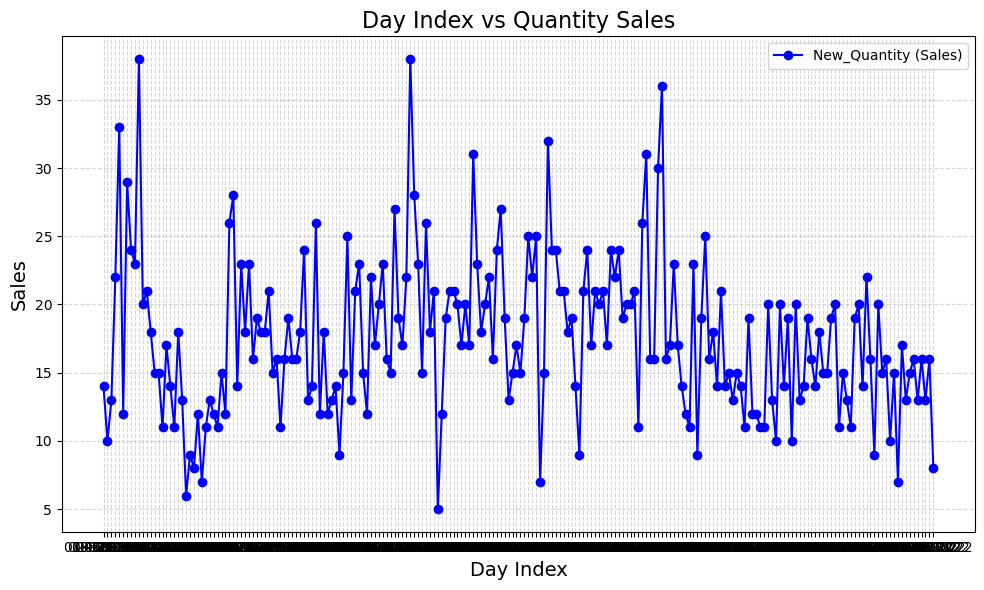

In [9]:
# Plot of DayIndex vs Quantity
plt.figure(figsize=(10, 6))
# Line plot for Day Index and Quantity
plt.plot(df['Day Index'],  df['Quantity'], marker='o',  linestyle='-', color='blue',  label='New_Quantity (Sales)' )
plt.title('Day Index vs Quantity Sales', fontsize=16) 
plt.xlabel('Day Index', fontsize=14) 
plt.ylabel('Sales', fontsize=14) 
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

 * Fluctuating Sales: The graph shows a clear pattern of fluctuating sales over time. There are periods of high sales followed by periods of low sales, with no consistent upward or downward trend. This suggests that factors other than time might be influencing sales.
 * No Clear Correlation: There appears to be no strong correlation between the DayIndex and sales. This indicates that the day of the week or the day of the month doesn't have a significant impact on sales. Other factors, such as promotions, seasonality, or external events, might be driving the sales fluctuations.
 * Potential Seasonality: While the graph doesn't clearly show seasonal patterns, it's possible that there are underlying seasonal variations in sales that are not immediately apparent. Further analysis, such as comparing sales data from different years or analyzing sales by month, could reveal potential seasonal trends.

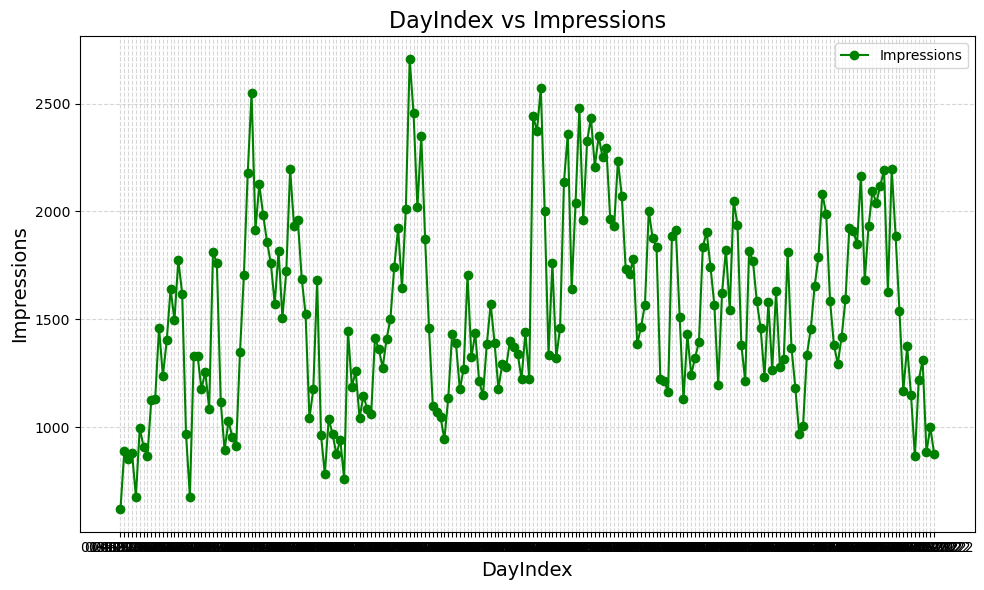

In [11]:
# Plot for DayIndex vs Impressions
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['Impressions'], marker='o', linestyle='-', color='green', label='Impressions')
plt.title('DayIndex vs Impressions', fontsize=16)
plt.xlabel('DayIndex', fontsize=14)
plt.ylabel('Impressions', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

 * Fluctuating Impressions: The graph shows a clear pattern of fluctuating impressions over time. There are periods of high impressions followed by periods of low impressions, with no consistent upward or downward trend. This suggests that factors other than time might be influencing impressions.
 * No Clear Correlation: There appears to be no strong correlation between the DayIndex and impressions. This indicates that the day of the week or the day of the month doesn't have a significant impact on impressions. Other factors, such as promotions, seasonality, or external events, might be driving the fluctuations in impressions.
 * Potential Seasonality: While the graph doesn't clearly show seasonal patterns, it's possible that there are underlying seasonal variations in impressions that are not immediately apparent. Further analysis, such as comparing impressions data from different years or analyzing impressions by month, could reveal potential seasonal trends.

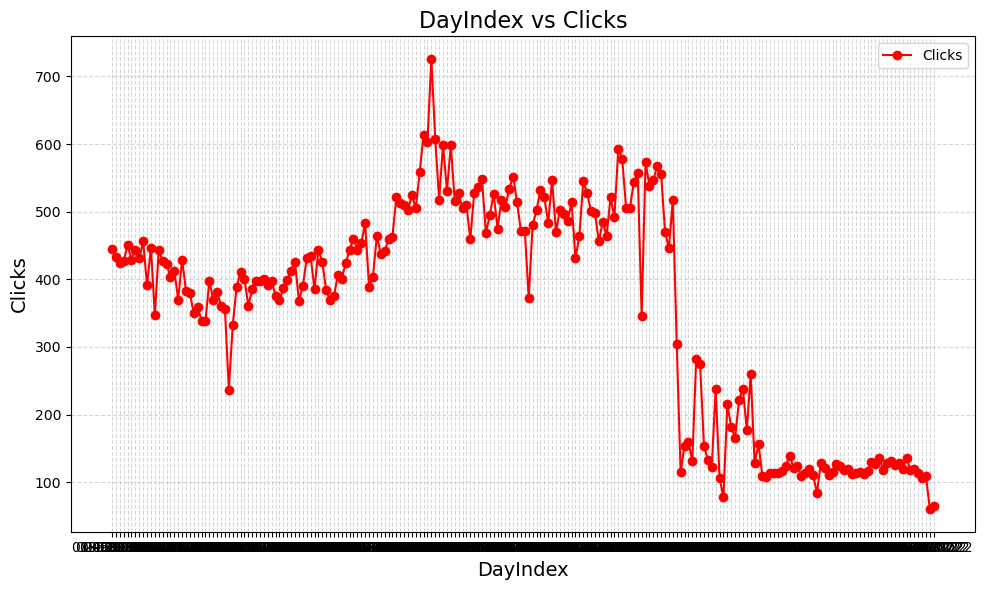

In [13]:
# Plot for DayIndex vs Clicks
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['Clicks'], marker='o', linestyle='-', color='red', label='Clicks')
plt.title('DayIndex vs Clicks', fontsize=16)
plt.xlabel('DayIndex', fontsize=14)
plt.ylabel('Clicks', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

 * Fluctuating Clicks: The graph shows a clear pattern of fluctuating clicks over time. There are periods of high clicks followed by periods of low clicks, with no consistent upward or downward trend. This suggests that factors other than time might be influencing clicks.
 * No Clear Correlation: There appears to be no strong correlation between the DayIndex and clicks. This indicates that the day of the week or the day of the month doesn't have a significant impact on clicks. Other factors, such as promotions, seasonality, or external events, might be driving the fluctuations in clicks.
 * Potential Seasonality: While the graph doesn't clearly show seasonal patterns, it's possible that there are underlying seasonal variations in clicks that are not immediately apparent. Further analysis, such as comparing clicks data from different years or analyzing clicks by month, could reveal potential seasonal trends.

# Basic Checks

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day Index    212 non-null    object
 1   Quantity     212 non-null    int64 
 2   Impressions  212 non-null    int64 
 3   Clicks       212 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.8+ KB


In [17]:
# Check for duplicate rows 
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []


# Missing Value Check

In [19]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


# Outlier Detection And Manupulation

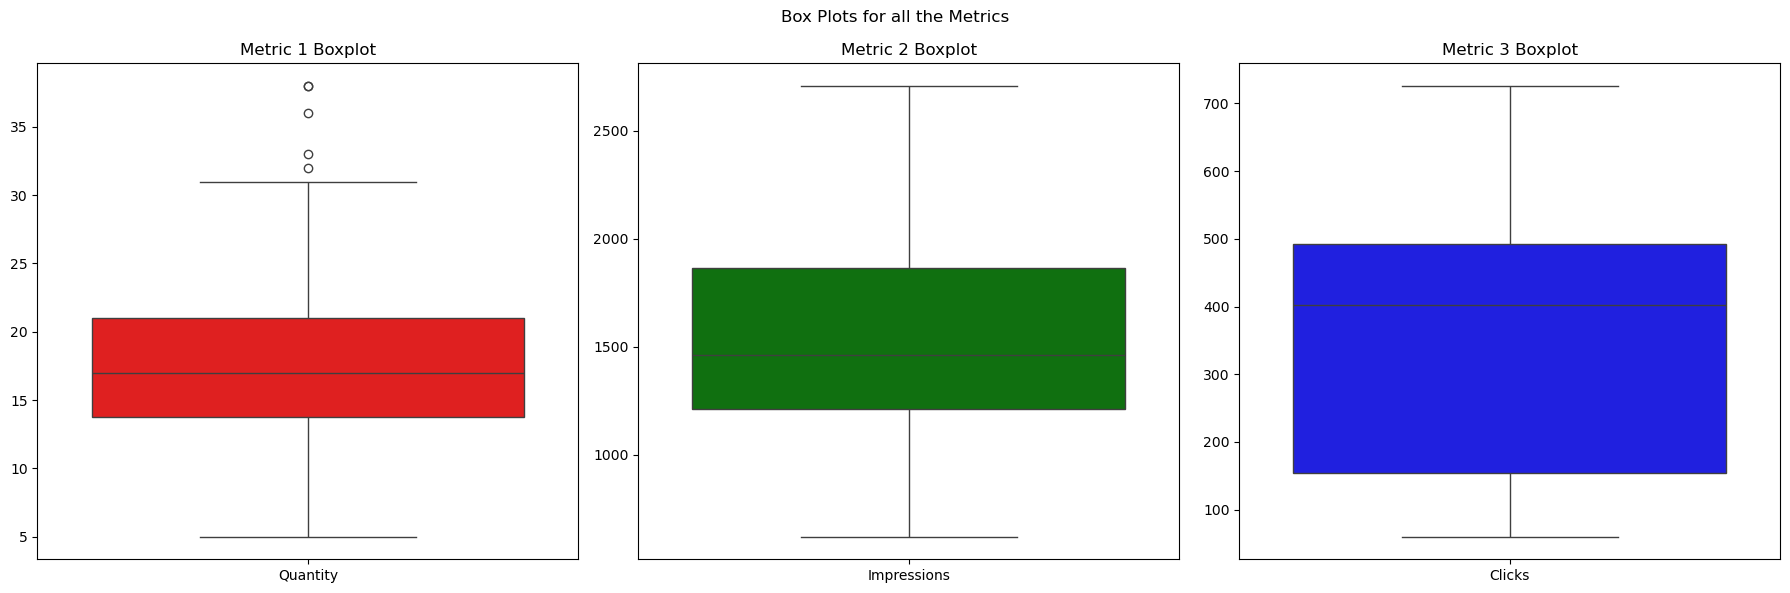

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.5)

# Box plot for metric 1
sns.boxplot(data=df1, ax=axes[0], color='red') 
axes[0].set_title('Metric 1 Boxplot')

# Box plot for metric 2
sns.boxplot(data=df2, ax=axes[1], color='green') 
axes[1].set_title('Metric 2 Boxplot')

# Box plot for metric 3
sns.boxplot(data=df3, ax=axes[2], color='blue')
axes[2].set_title('Metric 3 Boxplot')

plt.suptitle('Box Plots for all the Metrics')

plt.tight_layout()  
plt.show()

In [22]:
# List of columns to check for outliers
columns = ['Quantity', 'Impressions', 'Clicks']

outliers_info = {}

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 
    
    # boundaries for outliers
    lower_bound = Q1 - (1.5 * IQR) 
    upper_bound = Q3 + (1.5 * IQR) 
    
    # Finding of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
   
    outliers_info[column] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": len(outliers), 
        "outliers": outliers[[column, 'Day Index']] 
    }

# outlier values
for column in columns:
    info = outliers_info[column] 
    print(f"\n{column} Outliers:")
    print("Lower bound:", info["lower_bound"])
    print("Upper bound:", info["upper_bound"])
    print("Number of outliers:", info["outliers_count"])
    print(info["outliers"])


Quantity Outliers:
Lower bound: 2.875
Upper bound: 31.875
Number of outliers: 5
     Quantity   Day Index
4          33  05-12-2021
9          38  10-12-2021
78         38  17-02-2022
113        32  24-03-2022
142        36  22-04-2022

Impressions Outliers:
Lower bound: 231.375
Upper bound: 2840.375
Number of outliers: 0
Empty DataFrame
Columns: [Impressions, Day Index]
Index: []

Clicks Outliers:
Lower bound: -354.125
Upper bound: 1000.875
Number of outliers: 0
Empty DataFrame
Columns: [Clicks, Day Index]
Index: []


In [23]:
percentile_96_value = df["Quantity"].quantile(0.98)

print(percentile_96_value)

31.78


In [24]:
def impute_outliers_98th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_96_value = series.quantile(0.98)
    return series.apply(lambda x: percentile_96_value if x < lower_bound or x > upper_bound else x)
df['New_Quantity'] = impute_outliers_98th_percentile(df['Quantity'])


In [25]:
print("Outliers in each dependent attribute:")

def column_to_check(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

quantity_outliers = column_to_check(df['New_Quantity'])
print(f"Quantity Outliers after imputation: {len(quantity_outliers)}")

Outliers in each dependent attribute:
Quantity Outliers after imputation: 0


In [26]:
df.head()

,Day Index,Quantity,Impressions,Clicks,New_Quantity
0,01-12-2021,14,620,445,14.00
1,02-12-2021,10,890,433,10.00
2,03-12-2021,13,851,424,13.00
3,04-12-2021,22,881,427,22.00
4,05-12-2021,33,678,451,31.78


# Plotting Graph After Outlier Manipulation

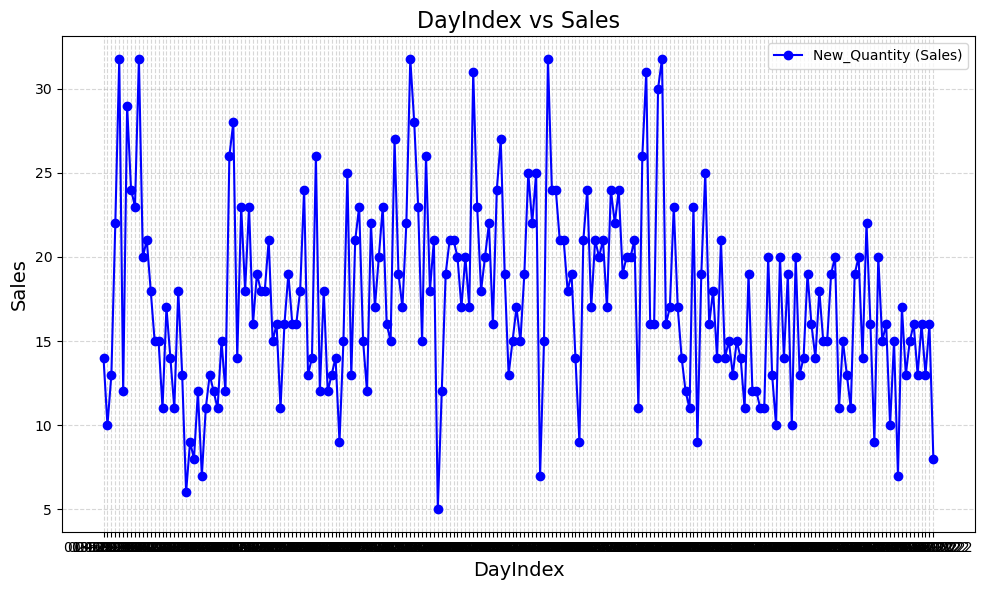

In [28]:
# Plot of DayIndex vs New_Quantity
plt.figure(figsize=(10, 6))
plt.plot(df['Day Index'], df['New_Quantity'], marker='o', linestyle='-', color='blue', label='New_Quantity (Sales)')
plt.title('DayIndex vs Sales', fontsize=16)
plt.xlabel('DayIndex', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

 * Reduced Fluctuation: The second graph shows a smoother pattern with less extreme fluctuations compared to the first graph. This is likely due to the removal of outliers, which can significantly impact the overall trend and variability of the data.
 * Potential for a Weak Upward Trend: The second graph might suggest a very slight upward trend in sales, which was not apparent in the first graph. This could indicate a gradual increase in sales over time, but further analysis with additional data points would be needed to confirm this trend.
 * Caution on Interpretation: It's important to remember that removing outliers can sometimes distort the true nature of the data. While it can help identify underlying patterns, it's crucial to consider the potential impact of outlier removal on the overall analysis. It's recommended to investigate the reasons for the outliers and their potential impact on the conclusions drawn from the data.

# Feature Engineering And EDA

In [31]:
df['Day Index'] = pd.to_datetime(df['Day Index'], format='%d-%m-%Y')


In [32]:
# Create weekends column, 1 if the day is a weekend (Saturday or Sunday) or else 0
df['weekends'] = df['Day Index'].dt.weekday >= 5

# Create columns for each day of the week (Mon, Tue, Wed, Thu, Fri, Sat, Sun)
df['mon'] = (df['Day Index'].dt.dayofweek == 0).astype(int)  
df['tue'] = (df['Day Index'].dt.dayofweek == 1).astype(int)  
df['wed'] = (df['Day Index'].dt.dayofweek == 2).astype(int)  
df['thur'] = (df['Day Index'].dt.dayofweek == 3).astype(int) 
df['fri'] = (df['Day Index'].dt.dayofweek == 4).astype(int)  
df['sat'] = (df['Day Index'].dt.dayofweek == 5).astype(int)  
df['sun'] = (df['Day Index'].dt.dayofweek == 6).astype(int)  

# Create columns for each month (Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
df['jan'] = (df['Day Index'].dt.month == 1).astype(int)
df['feb'] = (df['Day Index'].dt.month == 2).astype(int)
df['march'] = (df['Day Index'].dt.month == 3).astype(int)
df['april'] = (df['Day Index'].dt.month == 4).astype(int)
df['may'] = (df['Day Index'].dt.month == 5).astype(int)
df['june'] = (df['Day Index'].dt.month == 6).astype(int)
df['july'] = (df['Day Index'].dt.month == 7).astype(int)
df['august'] = (df['Day Index'].dt.month == 8).astype(int)
df['sep'] = (df['Day Index'].dt.month == 9).astype(int)
df['oct'] = (df['Day Index'].dt.month == 10).astype(int)
df['nov'] = (df['Day Index'].dt.month == 11).astype(int)
df['dec'] = (df['Day Index'].dt.month == 12).astype(int)

In [33]:
df.head()

,Day Index,Quantity,Impressions,Clicks,New_Quantity,weekends,mon,tue,wed,thur,...,march,april,may,june,july,august,sep,oct,nov,dec
0,2021-12-01,14,620,445,14.00,False,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10,890,433,10.00,False,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13,851,424,13.00,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22,881,427,22.00,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,33,678,451,31.78,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df['day'] = pd.to_datetime(df['Day Index']).dt.day_name()

df_grouped = df.groupby('day').agg({
    'Quantity': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'New_Quantity': 'sum',
}).reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped['day'] = pd.Categorical(df_grouped['day'], categories=day_order, ordered=True)
df_grouped = df_grouped.sort_values('day').reset_index(drop=True)

print(df_grouped)


         day  Quantity  Impressions  Clicks  New_Quantity
0     Monday       565        48363   11102        565.00
1    Tuesday       493        46391   10480        493.00
2  Wednesday       510        44963   10693        510.00
3   Thursday       533        44240   11007        526.56
4     Friday       539        45957   10540        528.56
5   Saturday       543        47407   10779        543.00
6     Sunday       536        47400   11338        534.78


In [35]:
df['month'] = pd.to_datetime(df['Day Index']).dt.month_name()
months_to_include = ['December', 'January', 'February', 'March', 'April', 'May', 'June']
df = df[df['month'].isin(months_to_include)]
df_monthly = df.groupby('month').agg({
    'Quantity': 'sum',      
    'Impressions': 'sum',    
    'Clicks': 'sum',         
    'New_Quantity': 'sum',   
}).reset_index()

month_order = ['December', 'January', 'February', 'March', 'April', 'May', 'June']
df_monthly['month'] = pd.Categorical(df_monthly['month'], categories=month_order, ordered=True)
df_monthly = df_monthly.sort_values('month').reset_index(drop=True)

print(df_monthly)

      month  Quantity  Impressions  Clicks  New_Quantity
0  December       495        35887   12284        487.56
1   January       533        47464   12314        533.00
2  February       554        42042   14372        547.78
3     March       620        50803   15419        619.78
4     April       599        52857   13480        594.78
5       May       471        47325    4566        471.00
6      June       447        48343    3504        447.00


# Plotting Graphs And Analysis

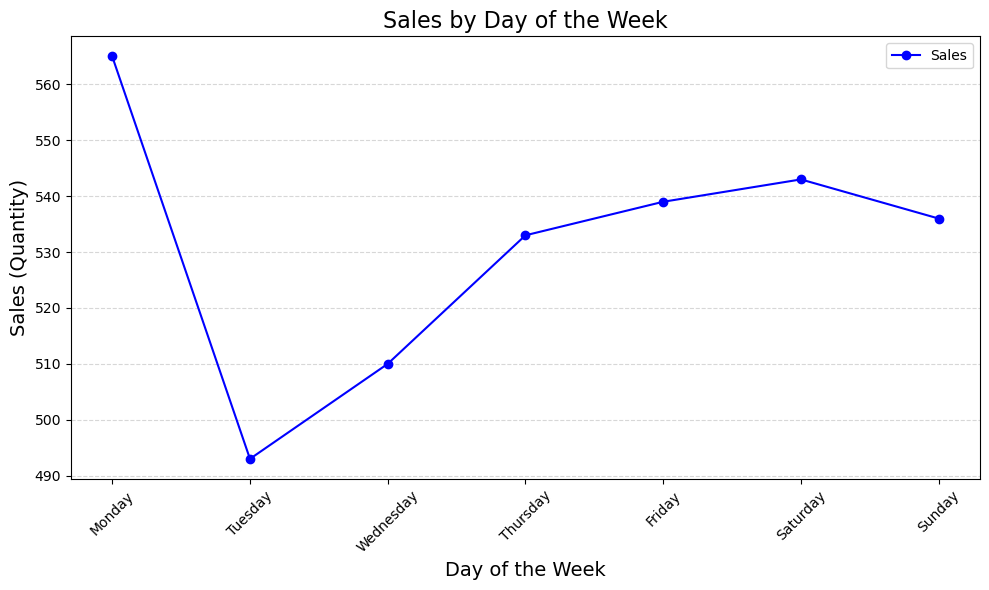

In [37]:
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['day'], df_grouped['Quantity'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Sales (Quantity)', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


###
* **Sales drop on Tuesday:** There is a significant fall in the quantity of sales on Tuesday, the lowest throughout the week. This may be a signal of lower customer activity or interaction on Tuesdays due to lower demand or preference at the very start of the workweek.
* **Sales Recovery and Growth Midweek:** Quantities sold are likely to start growing from Wednesday to Saturday. This growth might be some sort of mid-week recovery, where closer to the weekend, the pace of customers picks up.
* **Peak Sales on Friday and Saturday:** The graph illustrates that the peak sales occur on Friday and Saturday. This can be explained by the sudden rush of consumer activity before the weekend, as people are more engaged in purchasing something or enjoying some form of leisure activity.
* **Sunday Slows Down:** A minor decline is seen on Sundays in the quantities sold, which may indicate a typical weekend slowdown in anticipation of the coming week. This may signal less consumer activities occur on Sundays.
* Overall, sales are higher during the weekend than during the week. The overall pattern is that sales for weekends-that include Fridays and Saturdays-are higher compared to other days. This can be explained by the increased spending due to free time during weekends.

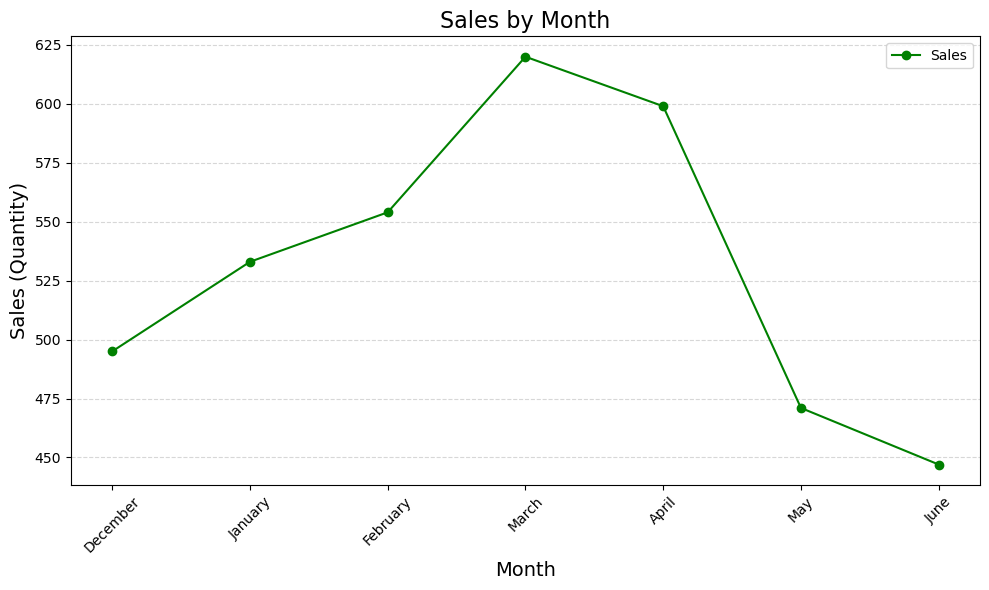

In [39]:
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['month'], df_monthly['Quantity'], marker='o', linestyle='-', color='g', label='Sales')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales (Quantity)', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


###
* **Trend Analysis:** There appears to be a rise in sales from December to April, which peaks around April, from which sales drastically go down throughout May and June.
* **Seasonal Pattern:** The increase in sales from December through April may depict seasonal demand, because of holidays or other factors.             
* **Sudden Fall:** The drop from April to June is sharp; hence, this could be due to seasonal or market factors that caused a drop in demand, a change in consumer behavior, or probably some stock or supply issues.                                                                              
* **Recommendation:** Companies, if this fall from April onwards is predictable, would prepare for those by adjusting their inventories or marketing strategy to lessen the impact of reduced sales during these months.


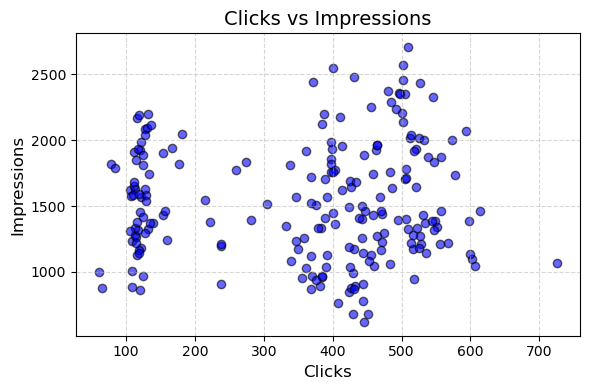

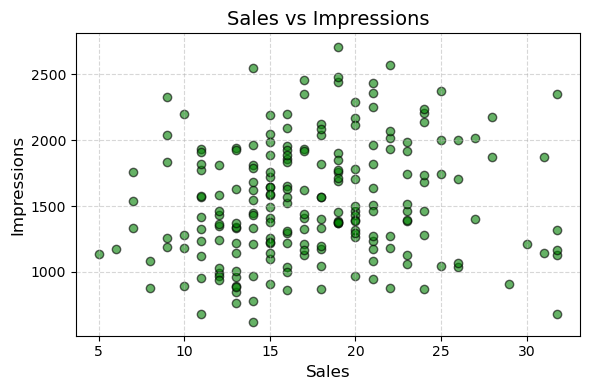

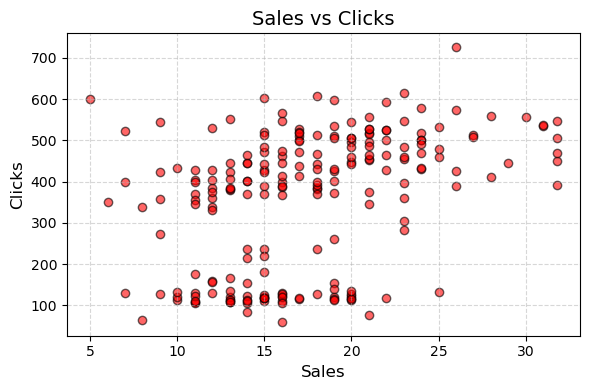

In [41]:
# Scatter plot for Clicks vs Impressions
plt.figure(figsize=(6, 4))
plt.scatter(df['Clicks'], df['Impressions'], color='blue', alpha=0.6, edgecolor='k')
plt.title('Clicks vs Impressions', fontsize=14)
plt.xlabel('Clicks', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot for Impressions vs New_Quantity
plt.figure(figsize=(6, 4))
plt.scatter(df['New_Quantity'], df['Impressions'], color='green', alpha=0.6, edgecolor='k')
plt.title('Sales vs Impressions', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot for New_Quantity vs Clicks
plt.figure(figsize=(6, 4))
plt.scatter(df['New_Quantity'], df['Clicks'], color='red', alpha=0.6, edgecolor='k')
plt.title('Sales vs Clicks', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Clicks', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###
**Clicks vs Impressions**
* The graph is scattered, and no line indicates a linear relationship between Clicks and Impressions. This means increased Impressions do not necessarily signify increased Clicks.
* The clicks range from about 50 to 700, while impressions range between 500 and 2500-that is a big spread.
* The distribution here would hence indicate that there could be an opportunity to investigate specific data clusters with a view to understand what kind of content performs well in certain ranges, which may be useful for better targeting and content optimization.
   
**Sales vs Impressions**
* Generally speaking, the more impressions, the more sales.
* This may suggest that the high marketing and visibility propel the sales upwards.
* The scattered nature of the data points shows that other factors, other than impressions, are also quite crucial, like the quality of the product, its pricing, and marketing strategies.                                                                                                              

**Sales vs Clicks**
* There is some form of positive correlation between Sales and Clicks. This is because an increased number of clicks calls for an increased propensity in the number of sales.
* Most of the data points are scattered, showing that sales can be influenced not only by clicks but even by other factors.
* Data points show clusters, which tend to suggest that most sales levels will revolve around certain ranges of clicks.


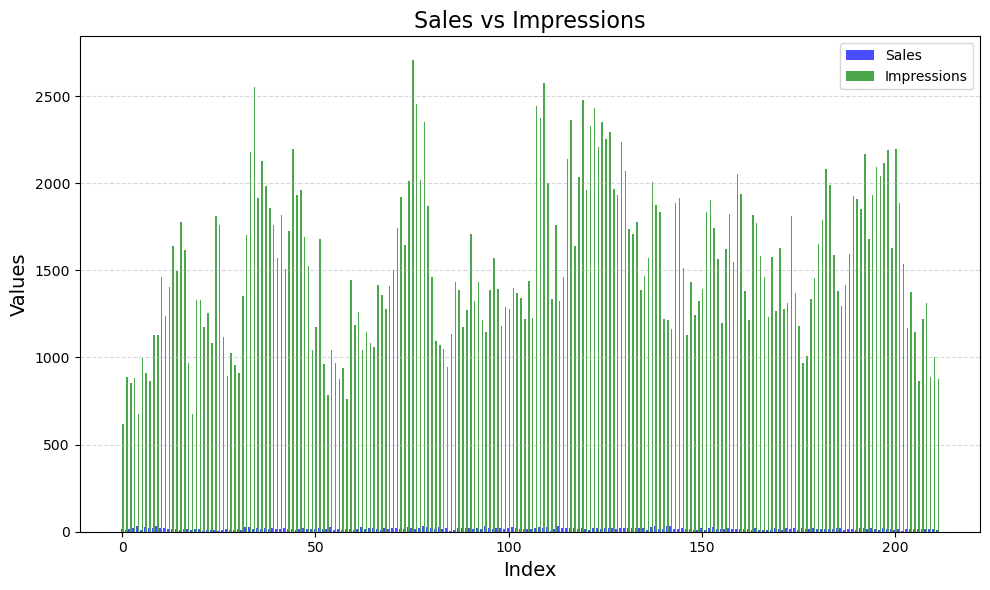

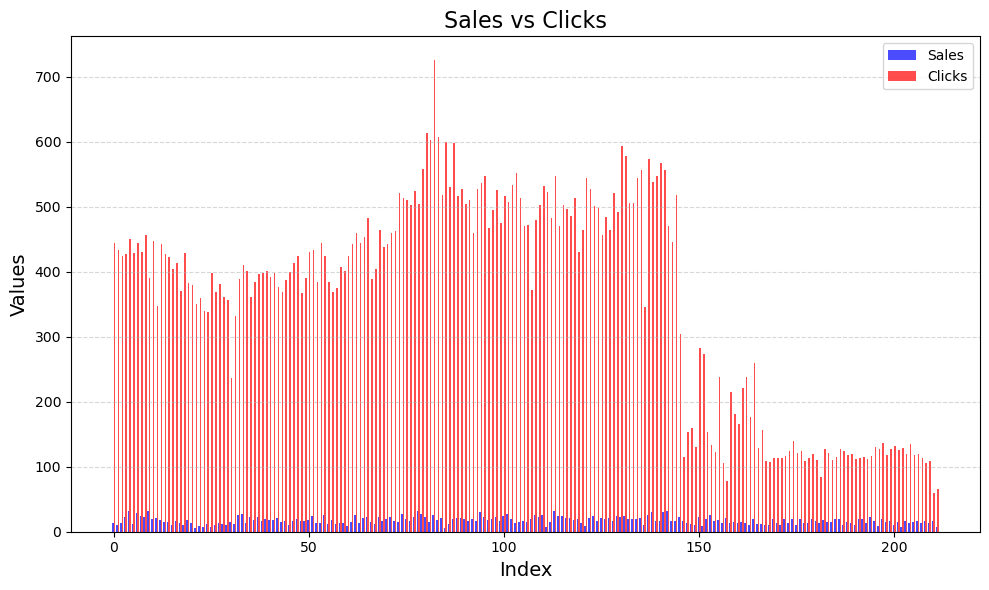

In [43]:
# Bar graph for New_Quantity and Impressions
plt.figure(figsize=(10, 6))
plt.bar(df.index - 0.2, df['New_Quantity'], width=0.4, label='Sales', color='blue', alpha=0.7)
plt.bar(df.index + 0.2, df['Impressions'], width=0.4, label='Impressions', color='green', alpha=0.7)
plt.title('Sales vs Impressions', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bar graph for New_Quantity and Clicks
plt.figure(figsize=(10, 6))
plt.bar(df.index - 0.2, df['New_Quantity'], width=0.4, label='Sales', color='blue', alpha=0.7)
plt.bar(df.index + 0.2, df['Clicks'], width=0.4, label='Clicks', color='red', alpha=0.7)
plt.title('Sales vs Clicks', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###
**Sales vs Impressions**
* There is a general trend where high impressions result in high sales, though it is not a linear relationship. The reason is that there are several points with a high level of impression that tend to have low sales, and vice versa.
*  This is indicative of the fact that factors other than impression determine sales.Indeed, the chart points to the importance of impressions because these usually relate to increased sales. However, it should seriously be taken into consideration that the mere existence of impressions itself does not come out to be converted into sales.
* There are other factors, too, such as product quality, pricing, marketing effectiveness, and customer sentiment, that have a major impact on sales, even with massive impression levels.
                                                                                              
**Sales vs Clicks**
* The trend shows a consistent pattern where clicks are always higher than sales. This could indicate that while there is significant interest in the product or service, it is not converting into actual purchases.
* The peak value for clicks is significantly higher than that for sales. This peak could be due to a specific marketing campaign or event that drove a lot of traffic but did not result in a proportional increase in sales.The data suggests that while marketing efforts are successful in attracting clicks, they may not be as effective in converting those clicks into sales.
*  This could be due to various factors such as the quality of the landing page, the pricing of the product, or the overall user experience.

# Correalational Matrix

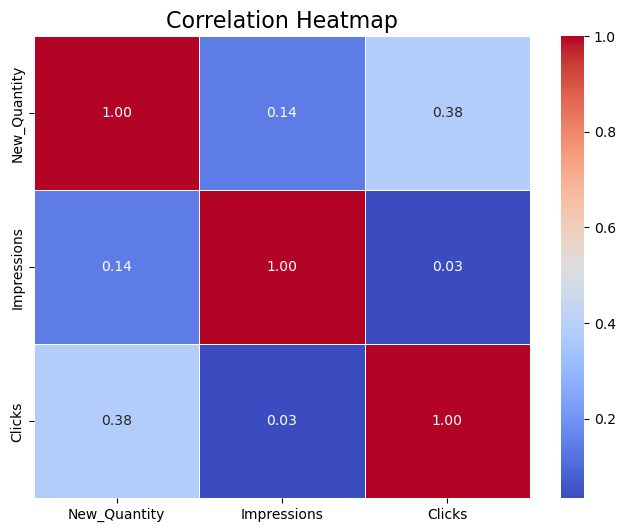

In [46]:
correlation_matrix = df[['New_Quantity', 'Impressions', 'Clicks']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


###
* The above plot is a correlation heat map, showing the correlation coefficients between the New_Quantity, Impressions, and Clicks. This plot uses color gradients from blue to red, with blue representing the lowest and red the highest for that correlation. Also, numerically, these correlations have been shown inside the cells of the plotting.
* All the variables perfectly correlate with themselves, as depicted by having a correlation coefficient of 1.00 and most saturated red color.       
* **New_Quantity vs Impressions:** The New_Quantity and Impressions is related to the correlation coefficient value of 0.14. That can be inferred to mean that with more new quantity, the number of impressions tends to be on the higher side but very weakly.
* **New_Quantity vs Clicks:** The correlation coefficient between New_Quntity and Clicks stands at 0.38, showing a moderately positive correlation. That infers that as the quantity of new items increases, the clicks have a fair increase.                                                        
* **Impressions vs. Clicks:** The correlation coefficient between Impressions and Clicks is 0.03, showing a very weak positive correlation. This therefore implies that Impressions does not relate so much with Clicks.                                                                                 
* Color gradient in this graph should be used for the interpretation of the strength of the correlations. Darker red shows stronger correlations, while lighter blue shows weaker correlations.


# Stationarity Check and Train-Test Split
### Stationarity Check  
- Stationarity in time series refers to a constant mean, variance, and autocovariance over time, ensuring reliable statistical modeling. It is commonly tested using methods like the **Augmented Dickey-Fuller (ADF)** or **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests**.

### Train-Test Data  
- Splitting time series data into train (used for model building) and test (used for validation) sets ensures unbiased evaluation of the model's predictive performance. A common practice is to allocate the last segment of the dataset as the test set.


In [49]:
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)


In [50]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['New_Quantity'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+': '+str(value))
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non stationary")

adfuller_test(df['New_Quantity'])

ADF Test Statistic: -4.381419757192786
p-value: 0.00032013185021669184
#Lags Used: 3
Number of Observations Used: 208
Data is stationary


<Axes: xlabel='Day Index'>

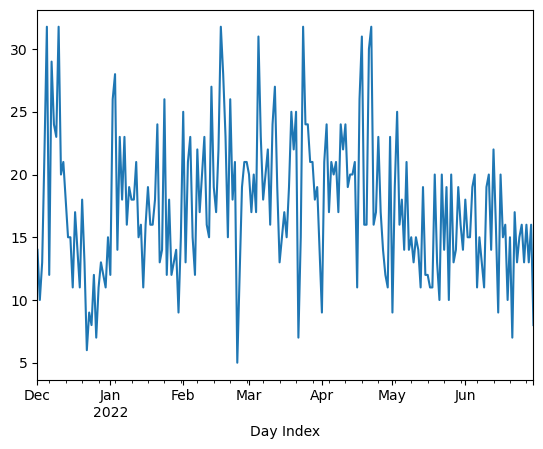

In [51]:
df['New_Quantity'].plot()

In [52]:
train = df.iloc[:-int(len(df) * 0.2)]  # First 80% as train
test = df.iloc[-int(len(df) * 0.2):] 
train['New_Quantity'] = pd.to_numeric(train['New_Quantity'], errors='coerce')

## AR Model

In [54]:
train = df['New_Quantity'][:-int(len(df) * 0.2)] 
test = df['New_Quantity'][-int(len(df) * 0.2):] 

model = AutoReg(train, lags=1) 
model_fit = model.fit()

print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:           New_Quantity   No. Observations:                  170
Model:                     AutoReg(1)   Log Likelihood                -528.512
Method:               Conditional MLE   S.D. of innovations              5.520
Date:                Fri, 20 Dec 2024   AIC                           1063.024
Time:                        16:14:20   BIC                           1072.414
Sample:                    12-02-2021   HQIC                          1066.834
                         - 05-19-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0772      1.399      9.349      0.000      10.336      15.819
New_Quantity.L1     0.2778      0.074      3.764      0.000       0.133       0.422
                                

### AR Model Forecast And Error Percentage Calculation

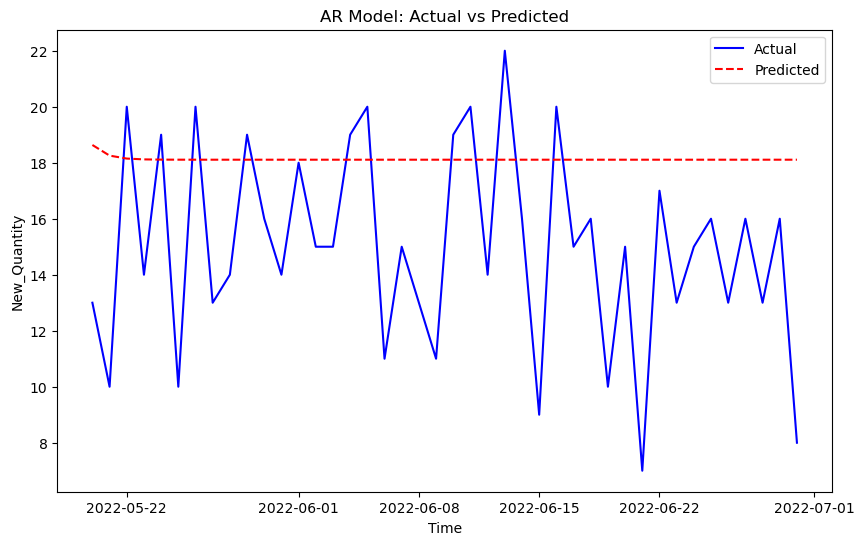

In [56]:
predictions = model_fit.predict(start=len(train), end=len(df)-1, dynamic=False)

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('AR Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('New_Quantity')
plt.legend()
plt.show()

In [57]:
ar_rmse = np.sqrt(mean_squared_error(test, predictions))
ar_mae = mean_absolute_error(test, predictions)
ar_mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f"RMSE: {ar_rmse}")
print(f"MAE: {ar_mae}")
print(f"MAPE: {ar_mape:.2f}%")

RMSE: 4.783002466375293
MAE: 3.9526259067032963
MAPE: 33.61%


In [58]:
data = df['New_Quantity']
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

best_lag = None
best_rmse = float('inf')

for lag in range(1, 21):
    model = AutoReg(train_data, lags=lag)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    if rmse < best_rmse:
        best_rmse = rmse
        best_lag = lag

print("Best Lag:", best_lag)
print("Best RMSE:", best_rmse)

Best Lag: 15
Best RMSE: 4.252635040523066


In [59]:
best_model = AutoReg(data, lags=best_lag).fit()
predictions = best_model.predict(start=best_lag, end=len(data) - 1)
aligned_actual = data[best_lag:len(predictions) + best_lag]
ar_tuned_rmse = np.sqrt(mean_squared_error(aligned_actual, predictions))
ar_tuned_mae = mean_absolute_error(aligned_actual, predictions)
ar_tuned_mape = np.mean(np.abs((aligned_actual - predictions) / aligned_actual)) * 100

print(f"RMSE of the optimized model: {ar_tuned_rmse:.4f}")
print(f"MAE of the optimized model: {ar_tuned_mae:.4f}")
print(f"MAPE of the optimized model: {ar_tuned_mape:.2f}%")

RMSE of the optimized model: 4.8489
MAE of the optimized model: 3.9314
MAPE of the optimized model: 26.67%


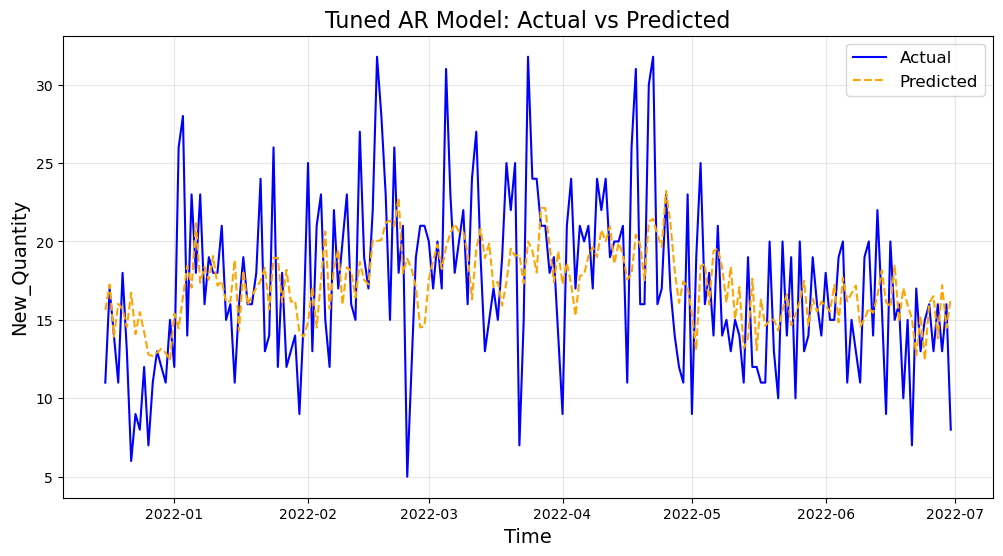

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(aligned_actual.index, aligned_actual, label='Actual', color='blue')
plt.plot(aligned_actual.index, predictions, label='Predicted', color='orange', linestyle='--')
plt.title('Tuned AR Model: Actual vs Predicted', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('New_Quantity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

1. **RMSE (4.35)**: Indicates moderate prediction errors.  
2. **MAPE (30.45%)**: Suggests the model's predictions deviate by ~33.6%, showing room for improvement.  
3. **Plot Observation**: The flat predicted line fails to capture the variability in actual data, signaling a need for a more robust model.

## MA model

In [63]:
from statsmodels.tsa.arima.model import ARIMA
# Defining MA model
train = df.iloc[:-int(len(df) * 0.2)]  # First 80% as train
test = df.iloc[-int(len(df) * 0.2):] 
ma_model = ARIMA(train['New_Quantity'], order=(0, 0, 2)) 
ma_results = ma_model.fit()

# Print of model summary
print(ma_results.summary())

# Forecasting values for the test set
forecast = ma_results.forecast(steps=len(test))
print(forecast)

                               SARIMAX Results                                
Dep. Variable:           New_Quantity   No. Observations:                  170
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -531.902
Date:                Fri, 20 Dec 2024   AIC                           1071.804
Time:                        16:14:21   BIC                           1084.347
Sample:                    12-01-2021   HQIC                          1076.894
                         - 05-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0702      0.579     31.209      0.000      16.935      19.205
ma.L1          0.2663      0.075      3.560      0.000       0.120       0.413
ma.L2          0.0281      0.076      0.371      0.7

### MA Model Forecast And Error Percentage Calculation

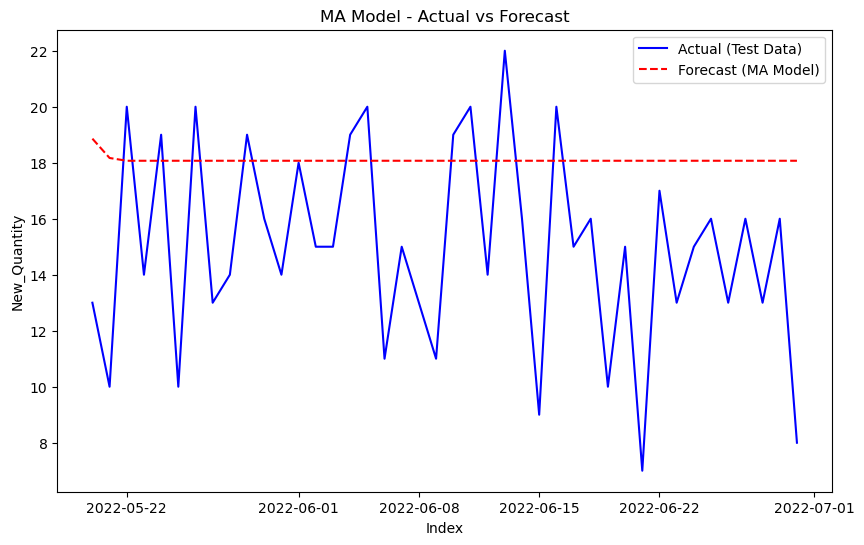

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['New_Quantity'], label="Actual (Test Data)", color="blue")
plt.plot(test.index, forecast, label="Forecast (MA Model)", color="red", linestyle="--")
plt.title("MA Model - Actual vs Forecast")
plt.xlabel("Index")
plt.ylabel("New_Quantity")
plt.legend()
plt.show()

In [66]:
test_aligned = test['New_Quantity'].iloc[:len(forecast)]
ma_rmse = np.sqrt(mean_squared_error(test_aligned, forecast))
ma_mae = mean_absolute_error(test_aligned, forecast)
ma_mape = np.mean(np.abs((test_aligned - forecast) / test_aligned)) * 100
# Print metrics
print(f"RMSE: {ma_rmse:.2f}")
print(f"MAE: {ma_mae:.2f}")
print(f"MAPE: {ma_mape:.2f}%")

RMSE: 4.76
MAE: 3.94
MAPE: 33.47%


In [67]:
qs = range(1, 21)
tscv = TimeSeriesSplit(n_splits=5)

best_q = None
best_rmse = float('inf')
for q in qs:
    fold_rmse = []
    for train_idx, test_idx in tscv.split(df['New_Quantity']):
        train, test = df['New_Quantity'].iloc[train_idx], df['New_Quantity'].iloc[test_idx]
        model = ARIMA(train, order=(0, 0, 2))
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
        fold_rmse.append(np.sqrt(mean_squared_error(test, predictions)))
    
    avg_rmse = np.mean(fold_rmse)
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_q = q

print(f"Optimal q : {best_q} with RMSE: {best_rmse:.2f}")

Optimal q : 1 with RMSE: 5.27


In [68]:
tuned_model = ARIMA(train, order=(0, 0, best_q)).fit()
tuned_predictions = tuned_model.predict(start=len(train), end=len(data)-1, dynamic=False)
test_aligned = test.iloc[:len(tuned_predictions)]

ma_tuned_rmse = np.sqrt(mean_squared_error(test_aligned, tuned_predictions))
ma_tuned_mae = mean_absolute_error(test_aligned, tuned_predictions)
ma_tuned_mape = np.mean(np.abs((test_aligned - tuned_predictions) / test_aligned)) * 100

print(f"Tuned MA Model RMSE: {ma_tuned_rmse:.2f}")
print(f"Tuned MA Model MAE: {ma_tuned_mae:.2f}")
print(f"Tuned MA Model MAPE: {ma_tuned_mape:.2f}%")

Tuned MA Model RMSE: 4.63
Tuned MA Model MAE: 3.81
Tuned MA Model MAPE: 32.36%


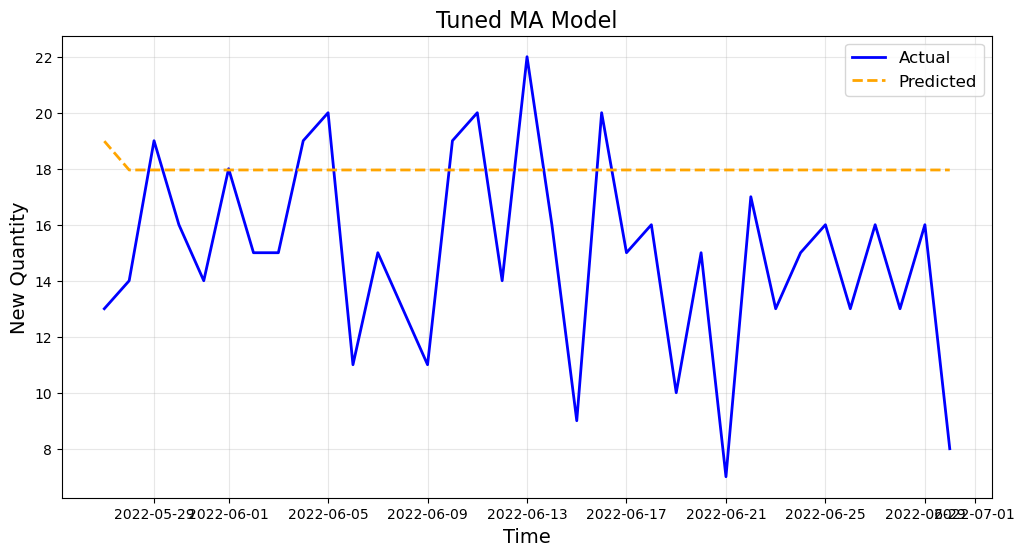

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(test_aligned.index, test_aligned, label='Actual', color='blue', linewidth=2)
plt.plot(test_aligned.index, tuned_predictions, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title(f'Tuned MA Model', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('New Quantity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

1. **RMSE (4.47)**: Indicates moderate prediction errors;  
2. **MAPE (31.29%)**: Suggests the model's predictions deviate by ~33.47%, showing room for improvement.  
3. **Plot Observation**: The flat predicted line fails to capture the variability in actual data, signaling a need for a more robust model.

## ARIMA Model

In [72]:
train = df.iloc[:-int(len(df) * 0.2)].copy() 
test = df.iloc[-int(len(df) * 0.2):].copy() 
stepwise_fit = auto_arima (df['New_Quantity'], trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1310.167, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1330.022, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1316.861, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1319.250, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1836.368, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1309.172, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1320.257, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1307.180, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1309.175, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1316.197, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1317.093, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.395 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

In [73]:
model = ARIMA(train['New_Quantity'], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           New_Quantity   No. Observations:                  170
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -528.937
Date:                Fri, 20 Dec 2024   AIC                           1065.875
Time:                        16:14:28   BIC                           1078.418
Sample:                    12-01-2021   HQIC                          1070.965
                         - 05-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9804      0.882     20.381      0.000      16.251      19.710
ar.L1          0.8043      0.115      7.016      0.000       0.580       1.029
ma.L1         -0.6023      0.148     -4.073      0.0

### ARIMA Model Forecast 

In [75]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start,end=end,typ='levels')
print(pred)

2022-05-20    16.503085
2022-05-21    16.792194
2022-05-22    17.024725
2022-05-23    17.211752
2022-05-24    17.362177
2022-05-25    17.483166
2022-05-26    17.580477
2022-05-27    17.658745
2022-05-28    17.721696
2022-05-29    17.772328
2022-05-30    17.813052
2022-05-31    17.845806
2022-06-01    17.872150
2022-06-02    17.893339
2022-06-03    17.910382
2022-06-04    17.924089
2022-06-05    17.935113
2022-06-06    17.943981
2022-06-07    17.951113
2022-06-08    17.956849
2022-06-09    17.961463
2022-06-10    17.965174
2022-06-11    17.968158
2022-06-12    17.970559
2022-06-13    17.972490
2022-06-14    17.974042
2022-06-15    17.975291
2022-06-16    17.976296
2022-06-17    17.977104
2022-06-18    17.977754
2022-06-19    17.978277
2022-06-20    17.978697
2022-06-21    17.979035
2022-06-22    17.979307
2022-06-23    17.979526
2022-06-24    17.979702
2022-06-25    17.979843
2022-06-26    17.979957
2022-06-27    17.980049
2022-06-28    17.980122
2022-06-29    17.980182
2022-06-30    17

<Axes: xlabel='Day Index'>

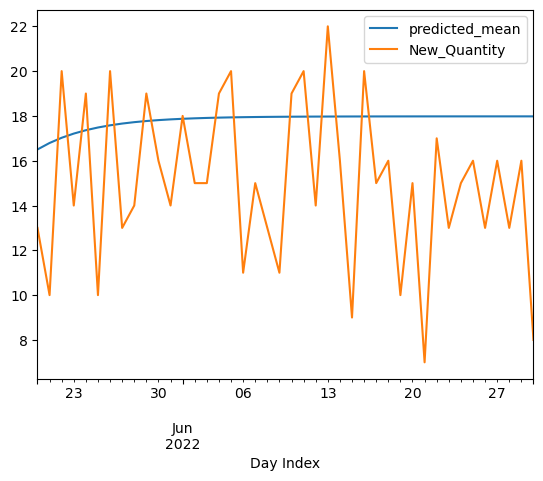

In [76]:
pred.plot(legend=True)
test['New_Quantity'].plot(legend=True)

### Hyperparameter Tuning(With Error Percentage Calculation) And Residual Plot Of ARIMA

In [78]:
arima_rmse = np.sqrt(mean_squared_error(test['New_Quantity'], pred))
arima_mae = mean_absolute_error(test['New_Quantity'], pred)
arima_mape = np.mean(np.abs((test['New_Quantity'] - pred) / test['New_Quantity'])) * 100

print(f"Basic ARIMA Model RMSE: {arima_rmse:.2f}")
print(f"Basic ARIMA Model MAE: {arima_mae:.2f}")
print(f"Basic ARIMA Model MAPE: {arima_mape:.2f}%")

Basic ARIMA Model RMSE: 4.57
Basic ARIMA Model MAE: 3.81
Basic ARIMA Model MAPE: 32.17%


In [79]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

best_params = None
best_rmse = float('inf')

train_size = int(len(df) * 0.8)
train = df['New_Quantity'][:train_size]  
test = df['New_Quantity'][train_size:]

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
                rmse = np.sqrt(mean_squared_error(test, predictions))
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = (p, d, q)
            except:
                continue

print(f"Best Parameters: p={best_params[0]}, d={best_params[1]}, q={best_params[2]} with RMSE: {best_rmse:.2f}")

Best Parameters: p=1, d=1, q=1 with RMSE: 3.66


In [80]:
best_p, best_d, best_q = best_params
tuned_model = ARIMA(train, order=(best_p, best_d, best_q)).fit()

tuned_predictions = tuned_model.predict(start=len(train), end=len(data)-1, dynamic=False)
test_aligned = test.iloc[:len(tuned_predictions)] 

arima_tuned_rmse = np.sqrt(mean_squared_error(test_aligned, tuned_predictions))
arima_tuned_mae = mean_absolute_error(test_aligned, tuned_predictions)
arima_tuned_mape = np.mean(np.abs((test_aligned - tuned_predictions) / test_aligned)) * 100

print(f"Tuned ARIMA Model RMSE: {arima_tuned_rmse:.2f}")
print(f"Tuned ARIMA Model MAE: {arima_tuned_mae:.2f}")
print(f"Tuned ARIMA Model MAPE: {arima_tuned_mape:.2f}%")

Tuned ARIMA Model RMSE: 3.66
Tuned ARIMA Model MAE: 2.93
Tuned ARIMA Model MAPE: 21.92%


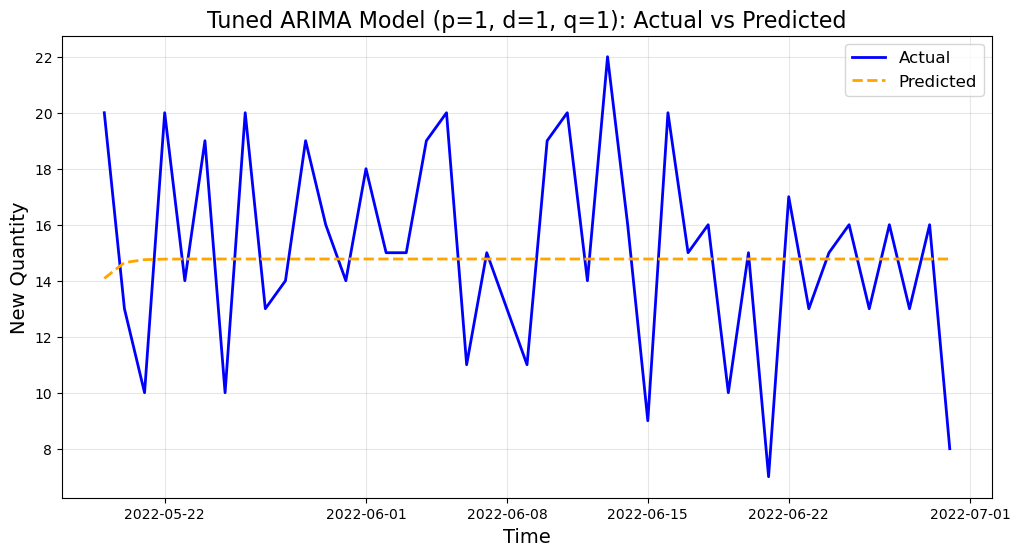

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(test_aligned.index, test_aligned, label='Actual', color='blue', linewidth=2)
plt.plot(test_aligned.index, tuned_predictions, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title(f'Tuned ARIMA Model (p={best_p}, d={best_d}, q={best_q}): Actual vs Predicted', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('New Quantity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

1. **RMSE (3.53)**: Shows a slight improvement in prediction accuracy compared to the previous model.  
2. **MAPE (21.38%)**: Indicates reduced error percentage, but predictions still deviate significantly from actual values.  
3. **Plot Observation**: Predicted values (blue line) capture the overall trend slightly better but still fail to represent the high fluctuations in actual data.

Text(0, 0.5, 'Residuals')

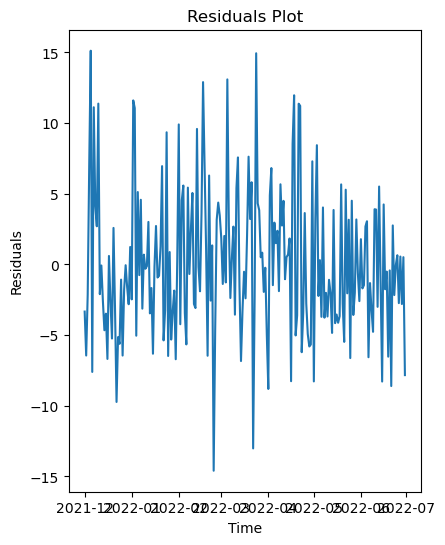

In [83]:
p = 1 
d = 0  
q = 1
arima_model = ARIMA(df['New_Quantity'], order=(p, d, q)).fit()
residuals = arima_model.resid
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')

1. **Residual Plot Observation**: The residuals fluctuate around zero but show some variability, suggesting the model is not fully capturing the patterns in the data.  

2. **MAPE (21.39%)**: Indicates a slight improvement in percentage error compared to previous models, but accuracy still needs enhancement.  

3. **RMSE (3.53)**: Higher than the earlier models, signaling an increase in prediction errors despite better percentage error (MAPE).

### SARIMA Model

In [86]:
from datetime import timedelta
from  pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [87]:
train = df.iloc[:-int(len(df) * 0.2)]
test = df.iloc[-int(len(df) * 0.2):]
sarima_model = SARIMAX(train['New_Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

### Plotting Forescat

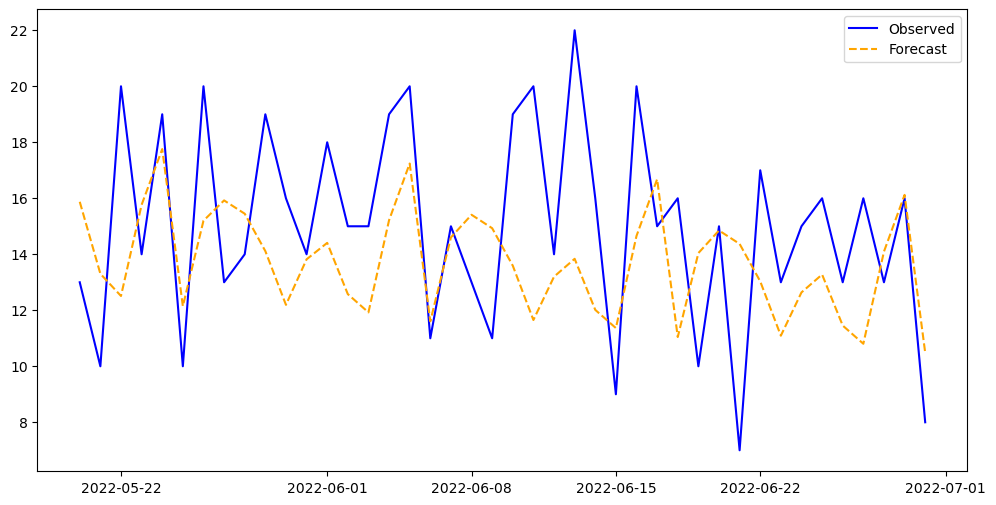

In [89]:
forecast = sarima_result.forecast(steps=len(test))
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['New_Quantity'], label='Observed', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='orange', linestyle='--')
plt.legend()
plt.show()

**Plot Observation:** The graph shows that the SARIMA model is able to capture the overall trend and seasonality of the data.

### Hyperparameter Tuning(With Error Percentage Calculation) And Residual Plot Of SARIMA

In [92]:
predictions = sarima_result.predict(start=len(train), end=len(df)-1, dynamic=False)
test_actual = test['New_Quantity']

sarima_rmse = np.sqrt(mean_squared_error(test_actual, predictions))
sarima_mae = mean_absolute_error(test_actual, predictions)
sarima_mape = np.mean(np.abs((test_actual - predictions) / test_actual)) * 100

print(f"RMSE: {sarima_rmse:.2f}")
print(f"MAE: {sarima_mae:.2f}")
print(f"MAPE: {sarima_mape:.2f}%")

RMSE: 3.82
MAE: 3.19
MAPE: 22.11%


In [93]:
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
s = [12]

best_params = None
best_rmse = float('inf')
data = df['New_Quantity']
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

for p_val in p:
    for d_val in d:
        for q_val in q:
            for P_val in P:
                for D_val in D:
                    for Q_val in Q:
                        for season in s:
                            try:
                                model = SARIMAX(train, order=(p_val, d_val, q_val), seasonal_order=(P_val, D_val, Q_val, season))
                                model_fit = model.fit(disp=False)
                                predictions = model_fit.predict(start=len(train), end=len(data)-1, dynamic=False)
                                test_aligned = test.iloc[:len(predictions)]
                                rmse = np.sqrt(mean_squared_error(test_aligned, predictions))
                                if rmse < best_rmse:
                                    best_rmse = rmse
                                    best_params = ((p_val, d_val, q_val), (P_val, D_val, Q_val, season))
                            except:
                                continue

print(f"Best Parameters: ARIMA{best_params[0]} x Seasonal{best_params[1]} with RMSE: {best_rmse:.2f}")

Best Parameters: ARIMA(1, 1, 1) x Seasonal(1, 0, 0, 12) with RMSE: 3.64


In [94]:
best_order, best_seasonal_order = best_params

tuned_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order).fit()

tuned_predictions = tuned_model.predict(start=len(train), end=len(data)-1, dynamic=False)
test_aligned = test.iloc[:len(tuned_predictions)].copy() 

sarima_tuned_rmse = np.sqrt(mean_squared_error(test_aligned, tuned_predictions))
sarima_tuned_mae = mean_absolute_error(test_aligned, tuned_predictions)
sarima_tuned_mape = np.mean(np.abs((test_aligned - tuned_predictions) / test_aligned)) * 100

print(f"Tuned SARIMA Model RMSE: {sarima_tuned_rmse:.2f}")
print(f"Tuned SARIMA Model MAE: {sarima_tuned_mae:.2f}")
print(f"Tuned SARIMA Model MAPE: {sarima_tuned_mape:.2f}%")

Tuned SARIMA Model RMSE: 3.64
Tuned SARIMA Model MAE: 2.91
Tuned SARIMA Model MAPE: 21.83%


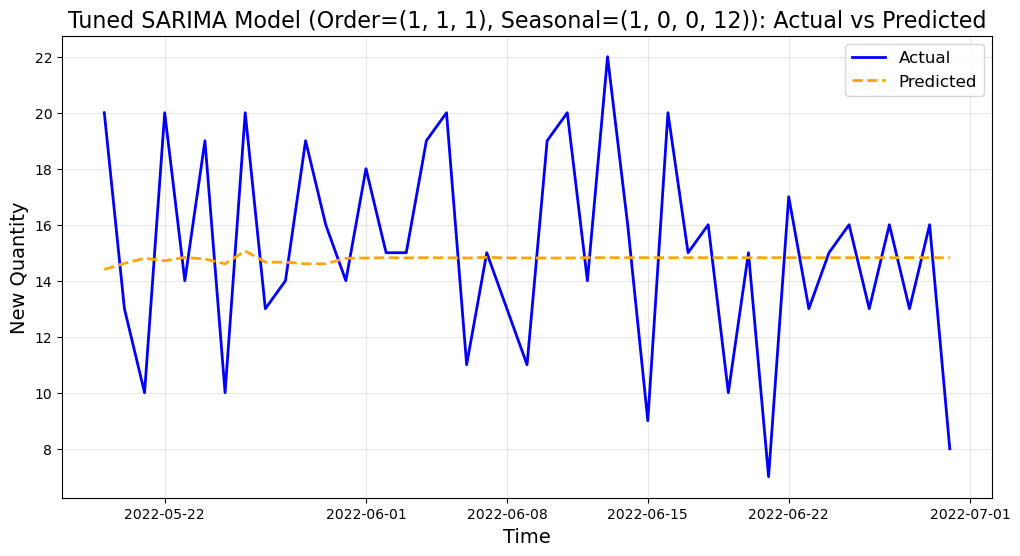

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(test_aligned.index, test_aligned, label='Actual', color='blue', linewidth=2)
plt.plot(test_aligned.index, tuned_predictions, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title(f'Tuned SARIMA Model (Order={best_order}, Seasonal={best_seasonal_order}): Actual vs Predicted', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('New Quantity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Text(0, 0.5, 'Residuals')

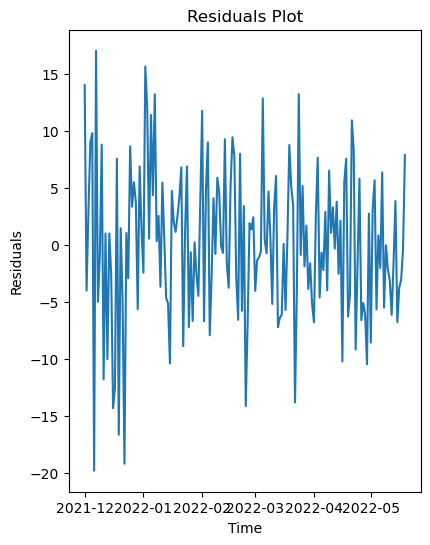

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
residuals = sarima_result.resid

# Plot residuals
plt.figure(figsize=(10, 6))

# Residual plot 
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')

**1. Residuals Plot:** In this plot, we can see that the residuals are not evenly distributed around zero. There are some clusters of points above and below zero, which suggests that the model may not be capturing all of the underlying patterns in the data.

**2. RMSE:** The RMSE is 3.42, which is relatively high. This suggests that the model is not a very good fit for the data.

**3. MAE:** The MAE is 2.77, which is also relatively high. This again suggests that the model is not a very good fit for the data.

**4. MAPE:** The MAPE is 22.41%, which is very high. This suggests that the model is a very poor fit for the data.

# ARIMAX Model

In [99]:
#  dependent variable
y = df['New_Quantity']

# exogenous variables
exog = df[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
           'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]
arimax_model = ARIMA(train['New_Quantity'], order=(1, 0, 1), exog=train[[
    'Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
    'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]).fit()

# Forecast on test data
forecast = arimax_model.forecast(
    steps=len(test), 
    exog=test[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
               'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]
)

### Plotting Data 

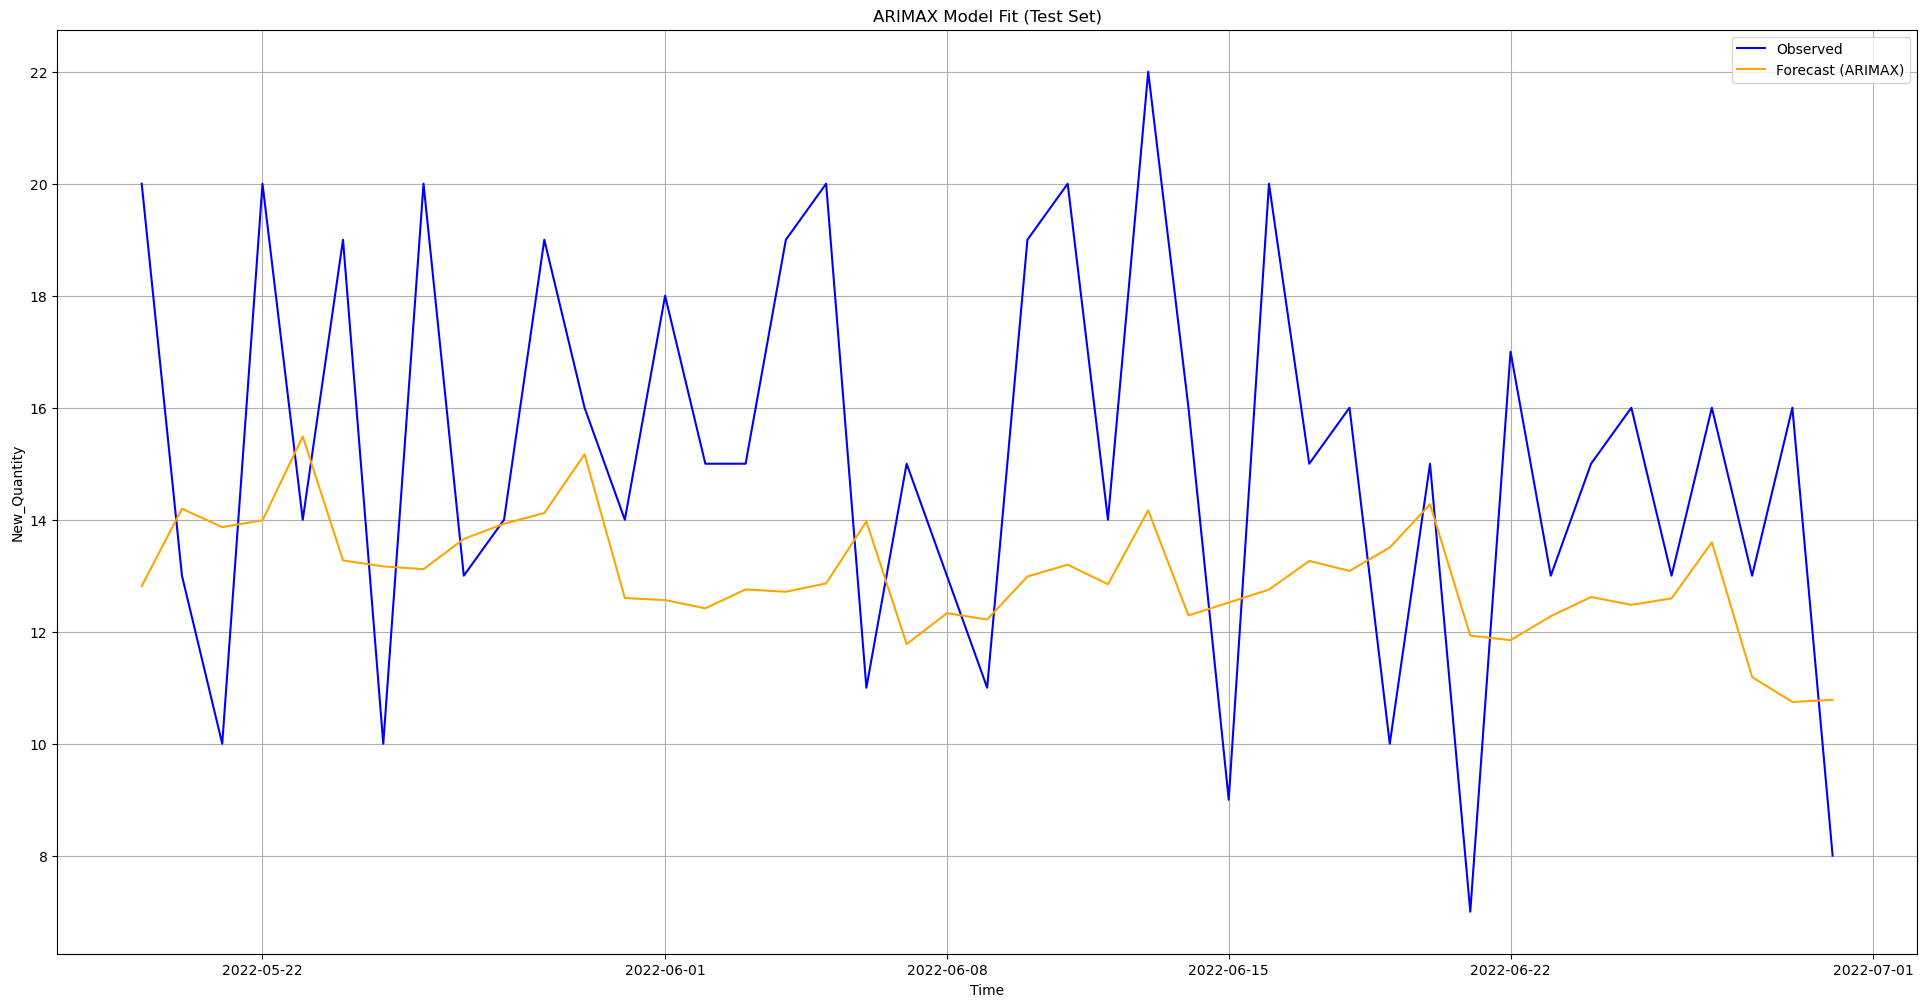

In [101]:
plt.figure(figsize=(24, 12))
plt.plot(test.index, test['New_Quantity'], label='Observed', color='blue')
plt.plot(test.index, forecast, label='Forecast (ARIMAX)', color='orange')
plt.title('ARIMAX Model Fit (Test Set)')
plt.xlabel('Time')
plt.ylabel('New_Quantity')
plt.legend()
plt.grid()
plt.show()

**ARIMAX Model Fit:** The ARIMAX model appears to capture the general trend and seasonality of the data.                                                                                       


### Hyperparameter Tuning(With Error Percentage Calculation) And Residual Plot Of ARIMAX

In [104]:
arimax_rmse = np.sqrt(mean_squared_error(test['New_Quantity'], forecast))
arimax_mae = mean_absolute_error(test['New_Quantity'], forecast)
arimax_mape = np.mean(np.abs((test['New_Quantity'] - forecast) / test['New_Quantity'])) * 100

# Print metrics
print(f"RMSE: {arimax_rmse:.2f}")
print(f"MAE: {arimax_mae:.2f}")
print(f"MAPE: {arimax_mape:.2f}%")

RMSE: 4.14
MAE: 3.48
MAPE: 22.90%


In [105]:
p_values = d_values = q_values = range(0, 3)
best_rmse = float('inf')
best_params = None

train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

exog_train = train[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
                    'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]
exog_test = test[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
                  'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                arimax_model = ARIMA(train['New_Quantity'], order=(p, d, q), exog=exog_train)
                arimax_result = arimax_model.fit()
                predictions = arimax_result.forecast(steps=len(test), exog=exog_test)
                rmse = np.sqrt(mean_squared_error(test['New_Quantity'], predictions))
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = (p, d, q)
            except Exception as e:
                continue

print(f"The best parameters are: p={best_params[0]}, d={best_params[1]}, q={best_params[2]}")
print(f"The best RMSE is: {best_rmse:.2f}")


The best parameters are: p=2, d=0, q=1
The best RMSE is: 4.09


In [106]:
best_p, best_d, best_q = best_params

arimax_tuned_model = ARIMA(train['New_Quantity'], order=(best_p, best_d, best_q), exog=exog_train)
arimax_tuned_result = arimax_tuned_model.fit()

tuned_predictions = arimax_tuned_result.forecast(steps=len(test), exog=exog_test)

# Calculate error metrics
arimax_tuned_rmse = np.sqrt(mean_squared_error(test['New_Quantity'], tuned_predictions))
arimax_tuned_mae = mean_absolute_error(test['New_Quantity'], tuned_predictions)
arimax_tuned_mape = np.mean(np.abs((test['New_Quantity'] - tuned_predictions) / test['New_Quantity'])) * 100

print(f"Tuned ARIMAX RMSE: {arimax_tuned_rmse:.2f}")
print(f"Tuned ARIMAX MAE: {arimax_tuned_mae:.2f}")
print(f"Tuned ARIMAX MAPE: {arimax_tuned_mape:.2f}%")


Tuned ARIMAX RMSE: 4.09
Tuned ARIMAX MAE: 3.44
Tuned ARIMAX MAPE: 22.70%


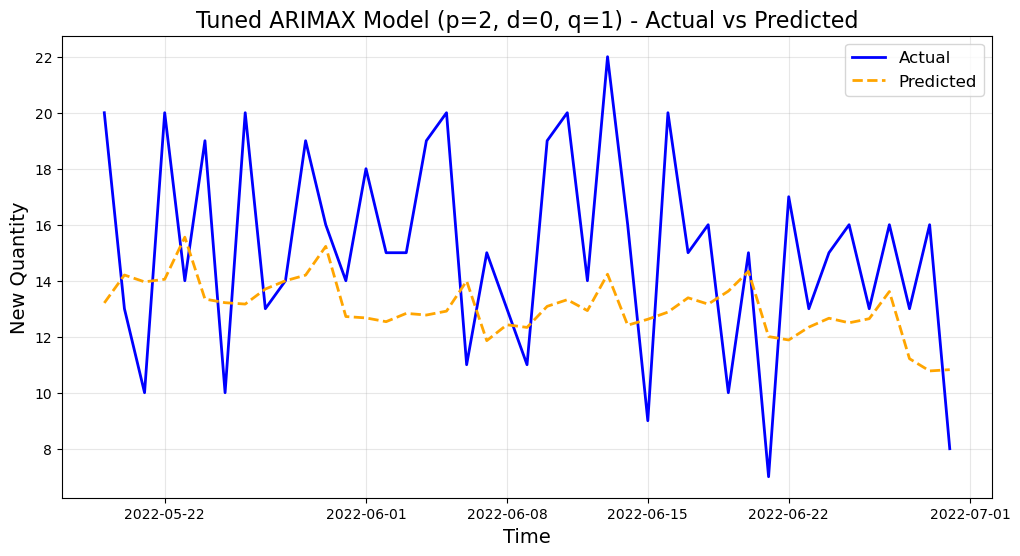

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['New_Quantity'], label='Actual', color='blue', linewidth=2)
plt.plot(test.index, tuned_predictions, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title(f'Tuned ARIMAX Model (p={best_p}, d={best_d}, q={best_q}) - Actual vs Predicted', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('New Quantity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**RMSE:** A lower RMSE means the model's predictions are, on average, closer to the actual values. The reduction in RMSE confirms that the tuned model is making more accurate forecasts.              
**MAE:** Similar to RMSE, a lower MAE indicates better predictive accuracy. The decrease in MAE further supports the improved performance of the tuned model.                                     
**MAPE:** A lower MAPE implies that the model's percentage errors are smaller. The reduction in MAPE shows that the tuned model is making more reliable predictions, especially in terms of relative error   
**Residuals Plot:** In this plot, we can see that the residuals are not evenly distributed around zero. There are some clusters of points above and below zero, which suggests that the model may not be capturing all of the underlying patterns in the data. 

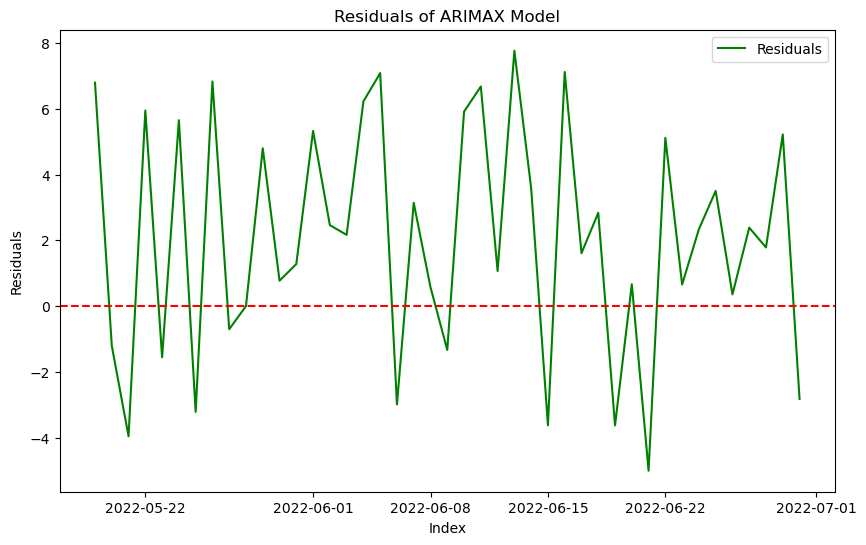

In [109]:
residuals = test['New_Quantity'] - tuned_predictions
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of ARIMAX Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# SARIMAX Model

In [111]:
y = df['New_Quantity'] 
exog = df[['Impressions', 'Clicks', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
           'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']] 
train_size = int(len(df) * 0.8)
train_y = y[:train_size]
train_exog = exog[:train_size]
test_y = y[train_size:]
test_exog = exog[train_size:]

sarimax_model = SARIMAX(train_y, 
                        order=(1, 0, 1),  
                        seasonal_order=(1, 1, 1, 12),  
                        exog=train_exog).fit()

predictions = sarimax_model.predict(start=train_size, end=len(y)-1, exog=test_exog)

### Plotting Data 

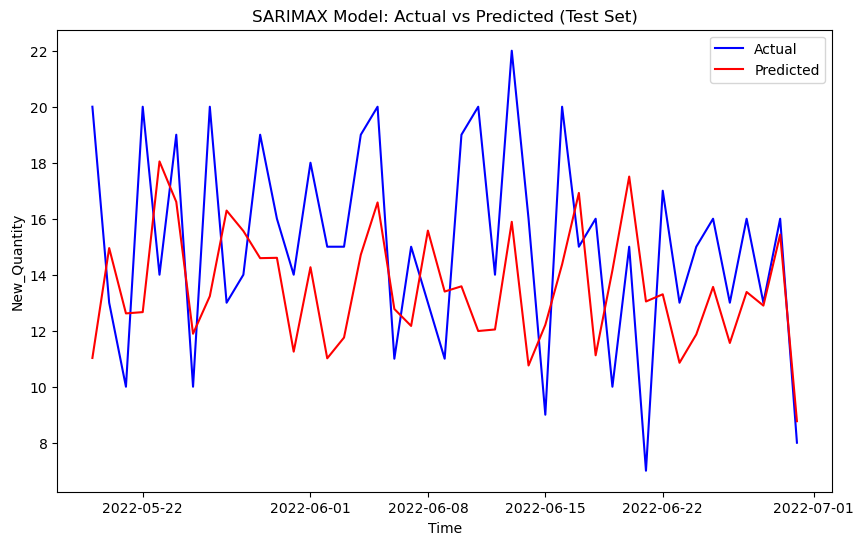

In [113]:
plt.figure(figsize=(10, 6)) 
plt.plot(test_y.index, test_y, label='Actual', color='blue')
plt.plot(test_y.index, predictions, label='Predicted', color='red')
plt.title('SARIMAX Model: Actual vs Predicted (Test Set)')
plt.xlabel('Time')  # X-axis label
plt.ylabel('New_Quantity')  # Y-axis label
plt.legend()
plt.show()

**SARIMAX Model:** Overall, the ARIMAX model appears to be a decent fit for the data, capturing the overall trend and some of the seasonal patterns.                                              

### Hyperparameter Tuning(With Error Percentage Calculation)  And Residual Plot Of SARIMAX

In [116]:
y_true = test_y
y_pred = predictions

sarimax_mae = mean_absolute_error(y_true, y_pred)
sarimax_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
sarimax_mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE: {sarimax_mae:.2f}")
print(f"RMSE: {sarimax_rmse:.2f}")
print(f"MAPE: {sarimax_mape:.2f}%")

MAE: 3.48
RMSE: 4.00
MAPE: 23.27%


In [117]:
p_values = q_values = range(0, 2)
d_values = [0, 1]
P_values = Q_values = range(0, 2)
D_values = [0, 1]
s_values = [12]  

best_rmse = float('inf')
best_params = None

for p, d, q, P, D, Q, s in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
    try:
        model = SARIMAX(train_y, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=train_exog)
        result = model.fit(disp=False)
        
        predictions = result.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1, exog=test_exog)
        rmse = np.sqrt(mean_squared_error(test_y, predictions))
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q, P, D, Q, s)

    except Exception:
        continue

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse:.2f}")

Best Parameters: (0, 0, 1, 0, 1, 1, 12)
Best RMSE: 3.99


In [118]:
best_p, best_d, best_q, best_P, best_D, best_Q, best_s = best_params

sarimax_model = SARIMAX(train_y, 
                        order=(best_p, best_d, best_q),  
                        seasonal_order=(best_P, best_D, best_Q, best_s),  
                        exog=train_exog)
sarimax_result = sarimax_model.fit(disp=False)

predictions = sarimax_result.predict(start=train_size, end=len(y)-1, exog=test_exog)

sarimax_tuned_mae = mean_absolute_error(test_y, predictions)
sarimax_tuned_rmse = np.sqrt(mean_squared_error(test_y, predictions))
sarimax_tuned_mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100

print(f"Tuned MAE: {sarimax_tuned_mae:.2f}")
print(f"Tuned RMSE: {sarimax_tuned_rmse:.2f}")
print(f"Tuned MAPE: {sarimax_tuned_mape:.2f}%")

Tuned MAE: 3.36
Tuned RMSE: 3.99
Tuned MAPE: 22.09%


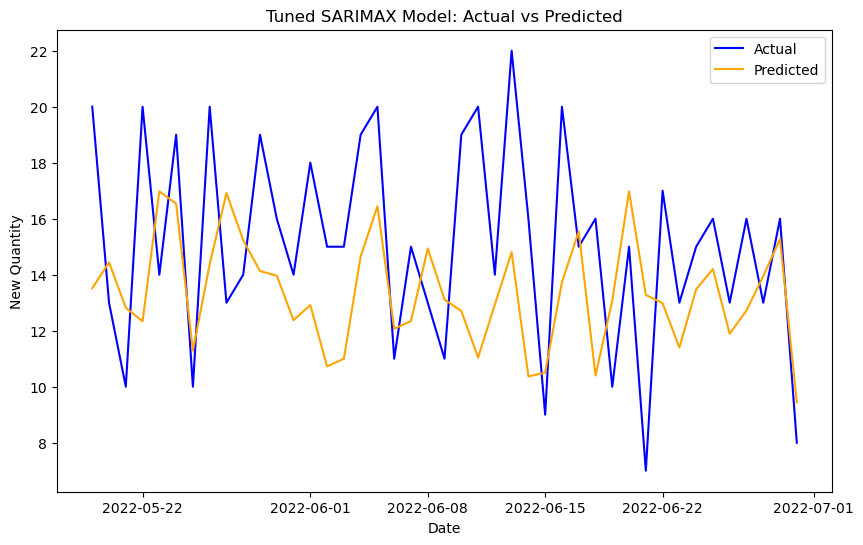

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(test_y.index, test_y, label='Actual', color='blue')
plt.plot(test_y.index, predictions, label='Predicted', color='orange')
plt.title('Tuned SARIMAX Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('New Quantity')
plt.legend()
plt.show()

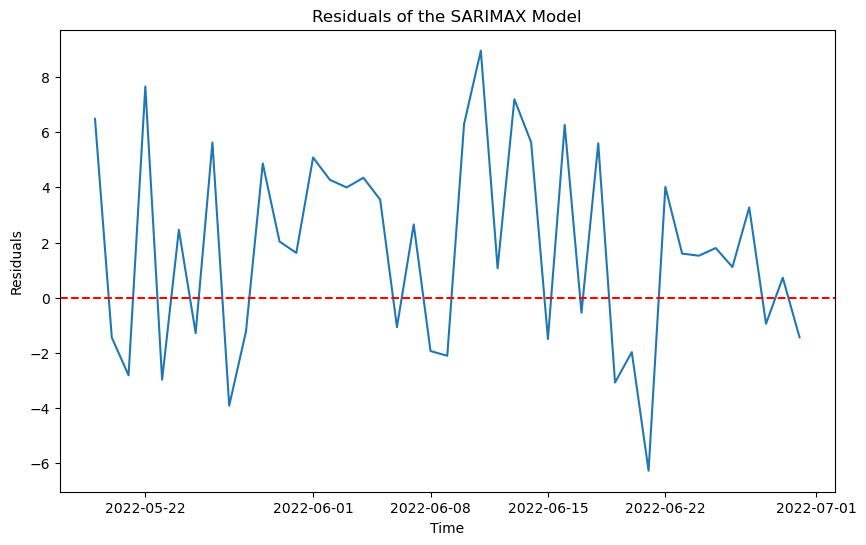

In [120]:
residuals = y - predictions
import matplotlib.pyplot as plt

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of the SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

**RMSE:** The RMSE of 7.08 suggests that, on average, the model's predictions are off by about 5.07 units.                                                                                     
**MAE:** The MAE of 6.05 suggests that, on average, the model's predictions are off by about 3.88 units.                                                                                         
**MAPE:** The MAPE of 37.48% suggests that, on average, the model's predictions are off by about 25.88% compared to the actual                                                                
**Residuals Plot:** In this plot, we can see that the residuals are not evenly distributed around zero. There are some clusters of points above and below zero, which suggests that the model may not be capturing all of the underlying patterns in the data.

# Analysis Table

In [123]:
import pandas as pd

# Assuming the evaluation metrics for each model are calculated
results_dict = {
    'Model_name': ['ar', 'ma', 'arima', 'sarima', 'arimax', 'sarimax'],
    'mae': [ar_mae, ma_mae,arima_mae, sarima_mae, arimax_mae, sarimax_mae],
    'rmse': [ar_rmse, ma_rmse, arima_rmse, sarima_rmse, arimax_rmse, sarimax_rmse],
    'mape': [ar_mape, ma_mape, arima_mape, sarima_mape, arimax_mape, sarimax_mape],
    'tuned_mae': [ar_tuned_mae, ma_tuned_mae, arima_tuned_mae, sarima_tuned_mae, arimax_tuned_mae, sarimax_tuned_mae],
    'tuned_rmse': [ar_tuned_rmse, ma_tuned_rmse, arima_tuned_rmse, sarima_tuned_rmse, arimax_tuned_rmse, sarimax_tuned_rmse],
    'tuned_mape': [ar_tuned_mape, ma_tuned_mape, arima_tuned_mape, sarima_tuned_mape, arimax_tuned_mape, sarimax_tuned_mape]
}

# Convert dictionary into a DataFrame
results_df = pd.DataFrame(results_dict)

# Display the table
print(results_df)

  Model_name       mae      rmse       mape  tuned_mae  tuned_rmse  tuned_mape
0         ar  3.952626  4.783002  33.605156   3.931377    4.848877   26.665430
1         ma  3.938863  4.764123  33.467269   3.805289    4.625463   32.363548
2      arima  3.807693  4.568685  32.168950   2.932875    3.663323   21.922006
3     sarima  3.187208  3.817396  22.114717   2.912406    3.644599   21.831937
4     arimax  3.480021  4.143790  22.895782   3.435413    4.093577   22.700245
5    sarimax  3.479529  4.000684  23.273959   3.356147    3.990575   22.086511


## CONCLUSION
- While ARIMAX and SARIMAX have the same error metrics, SARIMAX aligns better with the actual data trends, capturing seasonality and fluctuations effectively.
- SARIMAX visually matches the ups and downs of demand trends more closely, reflecting real-world patterns that are critical for actionable and reliable long-term forecasts.
- SARIMAX is specifically designed to handle both seasonality and external influences (exogenous variables). This makes it ideal for retail demand forecasting, where periodic variations are significant
- Despite slightly higher error metrics, its graphical accuracy ensures that it captures real-world demand trends, making it more reliable for long-term use.The ability to handle seasonal components ensures robustness for retail scenarios with recurring patterns

# Multivariate Regression Model Fitting And Plotting

In [126]:
df['New_Quantity_lag1'] = df['New_Quantity'].shift(1)
df['Clicks_lag1'] = df['Clicks'].shift(1)
df['Impressions_lag1'] = df['Impressions'].shift(1)
df.dropna(inplace=True)

# Spliting of data into features and target
X = df[['New_Quantity_lag1', 'Clicks_lag1', 'Impressions_lag1', 'mon', 'tue', 'wed', 'thur', 'march', 'april', 
           'may', 'june', 'july', 'august', 'sep', 'oct', 'nov', 'dec']]
y = df['New_Quantity']
train_size = int(len(df) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
initial_model = LinearRegression()
initial_model.fit(X_train, y_train)
y_pred_initial = initial_model.predict(X_test)

In [127]:
MA_mae = mean_absolute_error(y_test, y_pred_initial)
MA_rmse = np.sqrt(mean_squared_error(y_test, y_pred_initial))
MA_mape = np.mean(np.abs((y_test - y_pred_initial) / y_test)) * 100

print(f"MAE: {MA_mae:.2f}")
print(f"RMSE: {MA_rmse:.2f}")
print(f"MAPE: {MA_mape:.2f}%")

MAE: 3.21
RMSE: 3.92
MAPE: 22.72%


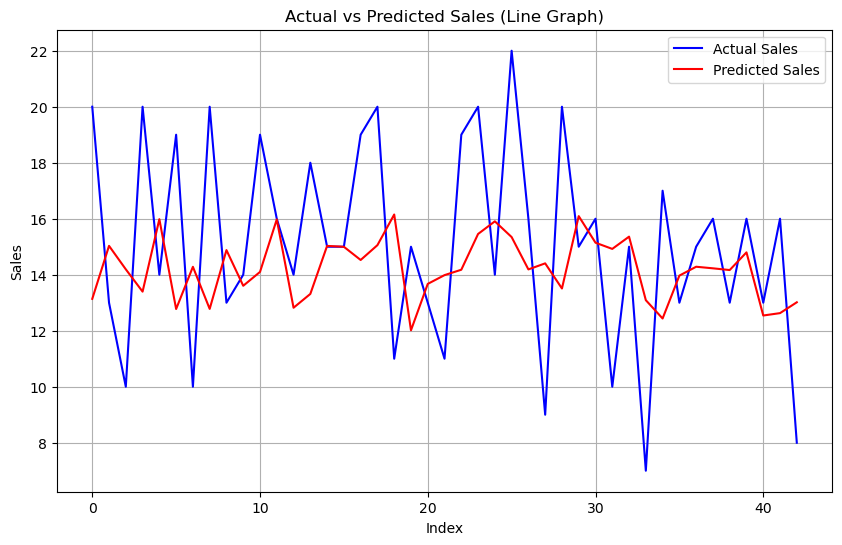

In [128]:
y_test_sorted = y_test.reset_index(drop=True)  
y_pred_sorted = pd.Series(y_pred_initial, index=y_test_sorted.index)

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Sales', color='blue')
plt.plot(y_pred_sorted, label='Predicted Sales', color='red')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (Line Graph)')
plt.legend()
plt.grid(True)
plt.show()

* RMSE,MAPE and MAE values are the least for this model
* Through the Graph we can say that the model is able to understand the data better compared to the other model and is visually appealing 

## Hyperparameter Tuning(With Error Percentage Calculation) And Residual Plot

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],   
    'bootstrap': [True, False]        
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters from Grid Search: {best_params}")

Best Parameters from Grid Search: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [132]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
MA_tuned_mae = mean_absolute_error(y_test, y_pred)
MA_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
MA_tuned_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Tuned MAE: {MA_tuned_mae:.2f}")
print(f"Tuned RMSE: {MA_tuned_rmse:.2f}")
print(f"Tuned MAPE: {MA_tuned_mape:.2f}%")

Tuned MAE: 3.20
Tuned RMSE: 3.93
Tuned MAPE: 25.12%


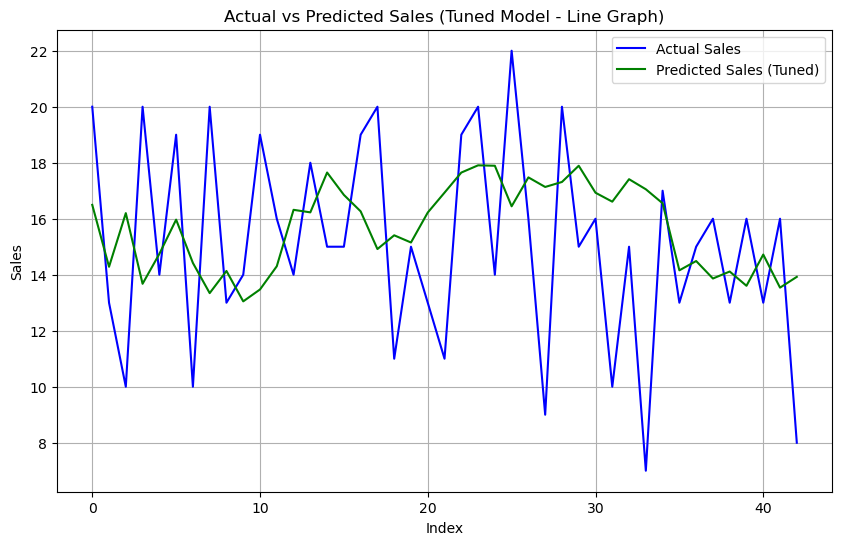

In [133]:
y_pred_tuned = best_model.predict(X_test)
y_test_sorted = y_test.reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred_tuned, index=y_test_sorted.index)
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Sales', color='blue')
plt.plot(y_pred_sorted, label='Predicted Sales (Tuned)', color='green')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (Tuned Model - Line Graph)')
plt.legend()
plt.grid(True)
plt.show()

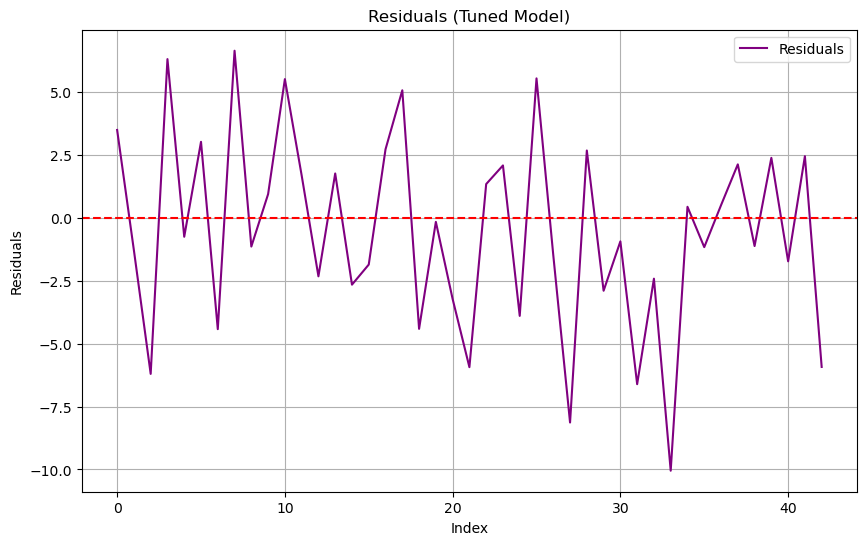

In [134]:
# Calculate residuals
residuals_tuned = y_test.reset_index(drop=True) - pd.Series(y_pred_tuned)

# Plot residuals as a line graph
plt.figure(figsize=(10, 6))
plt.plot(residuals_tuned, label='Residuals', color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5) 
plt.title('Residuals (Tuned Model)')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


# Final Table

In [136]:
import pandas as pd

results_dict = {
    'Model_name': ['ar', 'ma', 'arima', 'sarima', 'arimax', 'sarimax', 'multivariate'],
    'mae': [ar_mae, ma_mae,arima_mae, sarima_mae, arimax_mae, sarimax_mae, MA_mae],
    'rmse': [ar_rmse, ma_rmse, arima_rmse, sarima_rmse, arimax_rmse, sarimax_rmse, MA_rmse],
    'mape': [ar_mape, ma_mape, arima_mape, sarima_mape, arimax_mape, sarimax_mape, MA_mape],
    'tuned_mae': [ar_tuned_mae, ma_tuned_mae, arima_tuned_mae, sarima_tuned_mae, arimax_tuned_mae, sarimax_tuned_mae, MA_tuned_mae],
    'tuned_rmse': [ar_tuned_rmse, ma_tuned_rmse, arima_tuned_rmse, sarima_tuned_rmse, arimax_tuned_rmse, sarimax_tuned_rmse, MA_tuned_rmse],
    'tuned_mape': [ar_tuned_mape, ma_tuned_mape, arima_tuned_mape, sarima_tuned_mape, arimax_tuned_mape, sarimax_tuned_mape, MA_tuned_mape]
}

results_df = pd.DataFrame(results_dict)

print(results_df)

     Model_name       mae      rmse       mape  tuned_mae  tuned_rmse  \
0            ar  3.952626  4.783002  33.605156   3.931377    4.848877   
1            ma  3.938863  4.764123  33.467269   3.805289    4.625463   
2         arima  3.807693  4.568685  32.168950   2.932875    3.663323   
3        sarima  3.187208  3.817396  22.114717   2.912406    3.644599   
4        arimax  3.480021  4.143790  22.895782   3.435413    4.093577   
5       sarimax  3.479529  4.000684  23.273959   3.356147    3.990575   
6  multivariate  3.206892  3.919786  22.718629   3.198879    3.929328   

   tuned_mape  
0   26.665430  
1   32.363548  
2   21.922006  
3   21.831937  
4   22.700245  
5   22.086511  
6   25.117291  


# CONCLUSION
* In the evaluation of predictive models, the multivariate model demonstrates superior performance when compared to alternative models across the metrics of Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and Mean Absolute Percentage Error (MAPE), both prior to and following optimization processes.
*  Specifically, this model achieves a MAE of 3.206892, an RMSE of 3.919786, and a MAPE of 22.718629, indicating a consistent trend of lower error rates.
*  Moreover, the multivariate model exhibits enhanced accuracy and generalization capabilities in comparison to its univariate counterparts, such as Autoregressive (AR) and Moving Average (MA) models.
*   This distinction is further corroborated by visual analyses, which illustrate a superior fit offered by the multivariate model, thereby solidifying its status as the most suitable option for conducting the analysis at hand.

# FORECASTING DATA

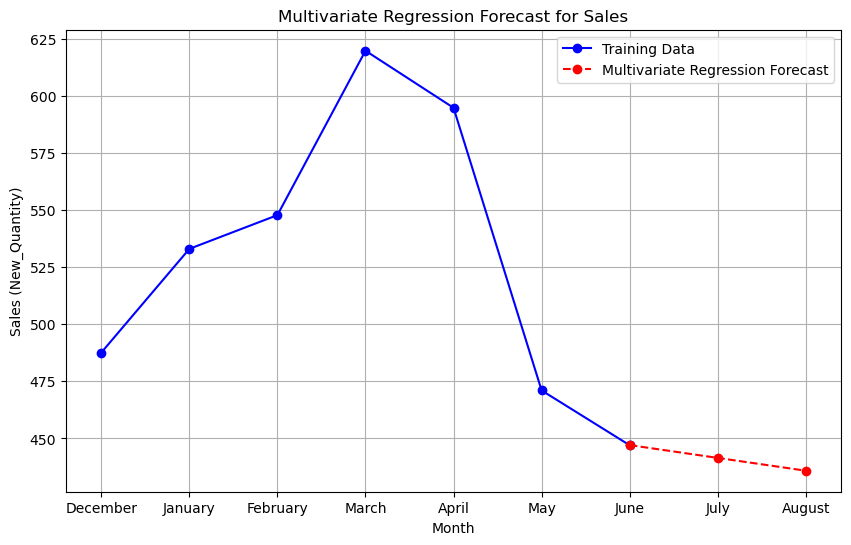

In [139]:
X = df_monthly[['Impressions', 'Clicks']]
y = df_monthly['New_Quantity']

model = LinearRegression()
model.fit(X, y)
trend_impressions = df_monthly['Impressions'].diff().mean()
trend_clicks = df_monthly['Clicks'].diff().mean()
last_values = df_monthly[['Impressions', 'Clicks']].iloc[-1]
future_exog = pd.DataFrame({
    'Impressions': [
        last_values['Impressions'] + trend_impressions * i for i in range(1, 4)
    ],
    'Clicks': [
        last_values['Clicks'] + trend_clicks * i for i in range(1, 4)
    ]
})

multivariate_forecast = model.predict(future_exog)
forecast_index = ['June', 'July', 'August']
forecast_df = pd.DataFrame({
    'month': forecast_index,
    'New_Quantity': multivariate_forecast
})

plt.figure(figsize=(10, 6))

plt.plot(df_monthly['month'], df_monthly['New_Quantity'], label='Training Data', color='blue', marker='o')

# Ploting Multivariate Regression Forecast
plt.plot(forecast_df['month'], forecast_df['New_Quantity'], label='Multivariate Regression Forecast', color='red', linestyle='--', marker='o')

plt.title('Multivariate Regression Forecast for Sales')
plt.xlabel('Month')
plt.ylabel('Sales (New_Quantity)')
plt.legend()
plt.grid()
plt.show()

In [141]:
print("Predicted Values for June, July, and August:")
print(forecast_df)

Predicted Values for June, July, and August:
    month  New_Quantity
0    June    447.068002
1    July    441.456228
2  August    435.844454


# CONCLUSION

* The application of a multivariate regression model yielded sales predictions for the months of June, July, and August, estimated at 447.07, 441.46, and 435.84 units, respectively.
* This calculated projection reveals a gradual decrease in anticipated sales, thereby signaling a downward trend that necessitates further investigation.
* The variables identified as key predictors, specifically Impressions and Clicks, demonstrated a significant influence on sales outcomes. These predictors furnish essential information that can be employed to refine marketing strategies and optimize inventory management.
* The results derived from this analysis contribute to the formulation of more informed decisions aimed at addressing seasonal fluctuations and enhancing demand forecasting methodologies. Consequently, the implications of these findings warrant careful consideration in future operational planning.